In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st
import json
from calendar import isleap

In [2]:
# OBS CNN
CNN = load('../../March2021/Observation_models/CNNY.joblib')
cnnObs=CNN.sel(time=slice('1981-1-01','2014-12-31'))
cnnObs.time

<xarray.DataArray 'time' (time: 2108)>
array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ..., '2014-12-29T00:00:00.000000000',
       '2014-12-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31

In [3]:
#Historica/ref best5 ensemble mean and std

ACCESS_CM2_CNN = load('../../March2021/Model_plots/ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IITMESM_CNN = load('../../March2021/Model_plots/IITM-ESM-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IPSL_CM6A_LR_CNN = load('../../March2021/Model_plots/IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
MPI_ESM1_2_LR_CNN = load('../../March2021/Model_plots/MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
EC_Earth3_CNN = load('../../March2021/Model_plots/EC-Earth3-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))


fList=(ACCESS_CM2_CNN,IITMESM_CNN,
       IPSL_CM6A_LR_CNN, MPI_ESM1_2_LR_CNN, 
       EC_Earth3_CNN)
MTs=[]
for fL in fList:
    ts1=fL.sel(time=slice('1981-1-01','2014-12-31'))
    MTs.append(ts1)
    
    
MS=np.array(MTs)
meanMS=np.mean(MS, axis=0)
#print(meanMS)

ensTs=cnnObs.copy()
ensTs.values=meanMS
#ensTs
ensTsMean=ensTs.groupby('time.dayofyear').mean()
ensTsStd=ensTs.groupby('time.dayofyear').std()




/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'yLR' (dayofyear: 62)>
array([0.2271046 , 0.23021248, 0.2303942 , 0.2390036 , 0.24580766,
       0.24115404, 0.24080846, 0.23420722, 0.23425702, 0.23652789,
       0.24580904, 0.25523502, 0.25694735, 0.25977076, 0.26767597,
       0.28229565, 0.28450135, 0.2832475 , 0.2911199 , 0.28726926,
       0.29140554, 0.29336098, 0.30361788, 0.3049638 , 0.30435636,
       0.30957442, 0.31003663, 0.30906531, 0.31371041, 0.3118812 ,
       0.31395642, 0.32315556, 0.3321908 , 0.32769081, 0.33784826,
       0.33367626, 0.33138225, 0.32241411, 0.32930166, 0.33615391,
       0.33555606, 0.31819655, 0.30407398, 0.31036603, 0.31003734,
       0.30808271, 0.29922223, 0.29130272, 0.29177728, 0.29577675,
       0.285535  , 0.27866872, 0.28121616, 0.28113638, 0.26696284,
       0.25378046, 0.2534543 , 0.25544959, 0.24160553, 0.24076395,
       0.23626044, 0.22500351])
Coordinates:
  * dayofyear  (dayofyear) int64 336 337 338 339 340 341 ... 27 28 29 30 31 335

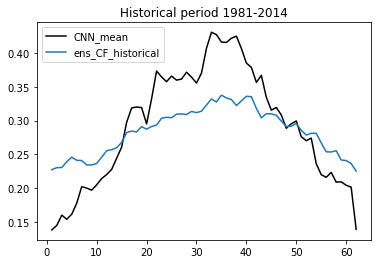

In [4]:
#Historical Change factor
x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn,label='CNN_mean', color='black')

ACCESS_CM2_CNN = load('../../March2021/Model_plots/ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IITMESM_CNN = load('../../March2021/Model_plots/IITM-ESM-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IPSL_CM6A_LR_CNN = load('../../March2021/Model_plots/IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
MPI_ESM1_2_LR_CNN = load('../../March2021/Model_plots/MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
EC_Earth3_CNN = load('../../March2021/Model_plots/EC-Earth3-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))



MTs=[]
for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        
    MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

ensFu=ACCESS_CM2_CNN.copy()
ensFu.values=MTs

ensFuMean=ensFu.groupby('time.dayofyear').mean()
ensFuStd=ensFu.groupby('time.dayofyear').std()


### Change factor

ensFuBC=ensFu.copy()

for d in ensFuBC.time:
    t=pd.Period(d.values, freq='H').dayofyear
    yr=d.dt.year.values
    if(isleap(yr) & t>334 ):
        t=t-1
    #print(t)
    ensFuBC.sel(time=d).values=(ensFuMean.sel(dayofyear=t).values+
                               (ensTsStd.sel(dayofyear=t).values/ensFuStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    

ensFuBC  
ensFuBCMean1=ensFuBC.groupby('time.dayofyear').mean()
ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

plt.plot(x,ensFuBCMean,label='ens_CF_historical')
plt.title('Historical period 1981-2014')


plt.legend()
ensFuBCMean


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'yLR' (dayofyear: 62)>
array([0.2271046 , 0.23021248, 0.2303942 , 0.2390036 , 0.24580766,
       0.24115404, 0.24080846, 0.23420722, 0.23425702, 0.23652789,
       0.24580904, 0.25523502, 0.25694735, 0.25977076, 0.26767597,
       0.28229565, 0.28450135, 0.2832475 , 0.2911199 , 0.28726926,
       0.29140554, 0.29336098, 0.30361788, 0.3049638 , 0.30435636,
       0.30957442, 0.31003663, 0.30906531, 0.31371041, 0.3118812 ,
       0.31395642, 0.32315556, 0.3321908 , 0.32769081, 0.33784826,
       0.33367626, 0.33138225, 0.32241411, 0.32930166, 0.33615391,
       0.33555606, 0.31819655, 0.30407398, 0.31036603, 0.31003734,
       0.30808271, 0.29922223, 0.29130272, 0.29177728, 0.29577675,
       0.285535  , 0.27866872, 0.28121616, 0.28113638, 0.26696284,
       0.25378046, 0.2534543 , 0.25544959, 0.24160553, 0.24076395,
       0.23626044, 0.22500351])
Coordinates:
  * dayofyear  (dayofyear) int64 336 337 338 339 340 341 ... 27 28 29 30 31 335

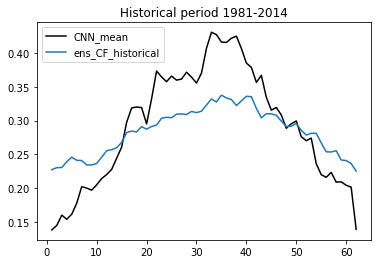

In [13]:
#Historical Change factor
x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn,label='CNN_mean', color='black')

ACCESS_CM2_CNN = load('../../March2021/Model_plots/ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IITMESM_CNN = load('../../March2021/Model_plots/IITM-ESM-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IPSL_CM6A_LR_CNN = load('../../March2021/Model_plots/IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
MPI_ESM1_2_LR_CNN = load('../../March2021/Model_plots/MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
EC_Earth3_CNN = load('../../March2021/Model_plots/EC-Earth3-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))



MTs=[]
for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        
    MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

ensFu=ACCESS_CM2_CNN.copy()
ensFu.values=MTs

ensFuMean=ensFu.groupby('time.dayofyear').mean()
ensFuStd=ensFu.groupby('time.dayofyear').std()


### Change factor

ensFuBC=ensFu.copy()

for d in cnnObs.time:
    t=pd.Period(d.values, freq='H').dayofyear
    yr=d.dt.year.values
    if(isleap(yr) & t>334 ):
        t=t-1
    #print(t)
    ensFuBC.sel(time=d,method="nearest").values=(ensFuMean.sel(dayofyear=t).values+
                               (ensTsStd.sel(dayofyear=t).values/ensFuStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    

ensFuBC  
ensFuBCMean1=ensFuBC.groupby('time.dayofyear').mean()
ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

plt.plot(x,ensFuBCMean,label='ens_CF_historical')
plt.title('Historical period 1981-2014')


plt.legend()
ensFuBCMean


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'yLR' (time: 2108)>
array([0.15908313, 0.26880312, 0.2786165 , ..., 0.8364895 , 0.7476723 ,
       0.7299858 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31
<xarray.DataArray 'yLR' (dayofyear: 63)>
array([0.31395642, 0.32315556, 0.3321908 , 0.32769081, 0.33784826,
       0.33367626, 0.33138225, 0.32241411, 0.32930166, 0.33615391,
       0.33555606, 0.31819655, 0.30407398, 0.31036603, 0.31003734,
       0.30808271, 0.29922223, 0.29130272, 0.29177728, 0.29577675,
       0.285535  , 0.27866872, 0.28121616, 0.28113638, 0.26696284,
       0.25378046, 0.2534543 , 0.25544959, 0.24160553, 0.24076395,
       0.23626044, 0.22500351, 0.2271046 , 0.23021248, 0.2303942 ,
       0.2390036 , 0.24580766, 0.24115404, 0.24080846, 0.23420722,
       0.23425702, 0.23652789, 0.24580904, 0.25523502, 0.25694735,
       0.25977076, 0.26767597, 0.28229565, 0.28450135, 0.2832475 ,
       0.2911199 , 0.28726926, 0.29140554, 0.29336098, 0.30

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'yLR' (dayofyear: 62)>
array([0.13778955, 0.14442556, 0.15970464, 0.15362181, 0.1610918 ,
       0.17751952, 0.2019929 , 0.19986244, 0.19676632, 0.20476642,
       0.21411772, 0.21998174, 0.22759439, 0.24416466, 0.26075462,
       0.29751235, 0.3188125 , 0.32027736, 0.31934345, 0.2951309 ,
       0.33247843, 0.37367138, 0.3648805 , 0.35782218, 0.36614454,
       0.3601385 , 0.36170438, 0.37184644, 0.36459172, 0.35574475,
       0.37054816, 0.40742993, 0.4312163 , 0.42765164, 0.4166559 ,
       0.41612694, 0.42234558, 0.425433  , 0.40710446, 0.38545018,
       0.37901774, 0.35681728, 0.36721972, 0.3345275 , 0.31552178,
       0.31957725, 0.30828   , 0.28859496, 0.29541054, 0.299441  ,
       0.27615014, 0.27021977, 0.27407643, 0.23609428, 0.21977665,
       0.21582867, 0.22317827, 0.20870663, 0.20913003, 0.20414548,
       0.20125592, 0.13862802], dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 336 337 338 339 340 341 ... 27 28 29 30 31 335

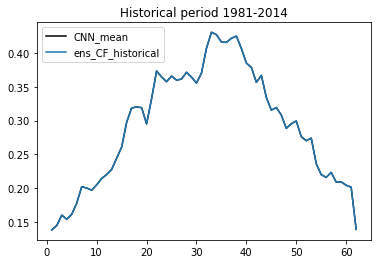

In [5]:
#Historical Change factor
x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn,label='CNN_mean', color='black')

ACCESS_CM2_CNN = load('../../March2021/Model_plots/ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IITMESM_CNN = load('../../March2021/Model_plots/IITM-ESM-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IPSL_CM6A_LR_CNN = load('../../March2021/Model_plots/IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
MPI_ESM1_2_LR_CNN = load('../../March2021/Model_plots/MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
EC_Earth3_CNN = load('../../March2021/Model_plots/EC-Earth3-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))



MTs=[]
for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        
    MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

ensFu=ensFu.copy()
ensFu.values=MTs

ensFuMean=ensFu.groupby('time.dayofyear').mean()
ensFuStd=ensFu.groupby('time.dayofyear').std()


### Change factor

ensFuBC=cnnObs.copy()

for d in cnnObs.time:
    t=pd.Period(d.values, freq='H').dayofyear
    yr=d.dt.year.values
    if(isleap(yr) & t>334 ):
        t=t-1
    #print(t)
    ensFuBC.sel(time=d).values=(ensFuMean.sel(dayofyear=t).values+
                               (ensFuStd.sel(dayofyear=t).values/ensTsStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    

print(cnnObs)
ensFuBC  
ensFuBCMean1=ensFuBC.groupby('time.dayofyear').mean()
print(ensFuMean)
ensFuBCMean1

ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

plt.plot(x,ensFuBCMean,label='ens_CF_historical')
plt.title('Historical period 1981-2014')


plt.legend()
ensFuBCMean


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


0.3115386962890625
0.35937920598422785
0.08617805444065446
0.07836323231458664
0.15908313
0.31395644
0.18906105705996348
0.3115386962890625
%%%%nearest%%%%%%%
0.43837928771972656
0.3635821496739107
0.09138225519504944
0.07515721768140793
0.26880312
0.32315558
0.2974960074130895
0.43837928771972656
%%%%nearest%%%%%%%
0.4374654769897461
0.35856726415017065
0.09458033930011746
0.08737188577651978
0.2786165
0.3321908
0.3005728914300172
0.4374654769897461
%%%%nearest%%%%%%%
0.46204004287719724
0.3520037405631121
0.08826779091784111
0.08498574793338776
0.25586337
0.3276908
0.2774024134160161
0.46204004287719724
%%%%nearest%%%%%%%
0.39825799465179446
0.3441485615337596
0.08823998692626718
0.0817311629652977
0.24255404
0.33784828
0.24126537800835546
0.39825799465179446
%%%%nearest%%%%%%%
0.34177584648132325
0.3450762359534993
0.0814421386747929
0.07530864328145981
0.3200779
0.33367625
0.33037036852983187
0.34177584648132325
%%%%nearest%%%%%%%
0.3039555549621582
0.3400136961656458
0.07958732698

0.23105178990776248
0.3356679677963257
%%%%nearest%%%%%%%
0.3897284984588623
0.31157111350227806
0.09103183229726143
0.06571442633867264
0.2116182
0.31036603
0.17477928838076937
0.3897284984588623
%%%%nearest%%%%%%%
0.3934643745422363
0.3143277413704816
0.08227290874977934
0.07343865185976028
0.2232591
0.31003734
0.21711056880750101
0.3934643745422363
%%%%nearest%%%%%%%
0.28082339763641356
0.3201224583036759
0.07236019536019343
0.0718163400888443
0.21812628
0.3080827
0.22948481303854706
0.28082339763641356
%%%%nearest%%%%%%%
0.24391069412231445
0.31498461085207324
0.08233504046972841
0.06283453106880188
0.13346836
0.29922223
0.09778951985145776
0.24391069412231445
%%%%nearest%%%%%%%
0.25977020263671874
0.3244542788056766
0.07394019305079466
0.061260003596544266
0.15979232
0.29130277
0.1657225191502349
0.25977020263671874
%%%%nearest%%%%%%%
0.26107563972473147
0.3211783857906566
0.07699985240758761
0.059422191232442856
0.1766247
0.29177725
0.17196258980272477
0.26107563972473147
%%%%nea

0.273844872038656
0.3967536687850952
%%%%nearest%%%%%%%
0.33182220458984374
0.27554878627552704
0.06559891079252103
0.0707433894276619
0.19039033
0.25378048
0.21676838470979484
0.33182220458984374
%%%%nearest%%%%%%%
0.3916467189788818
0.27080214409267206
0.07749220368346284
0.062231823801994324
0.104081646
0.25345433
0.08480055215460755
0.3916467189788818
%%%%nearest%%%%%%%
0.39880273342132566
0.27692962394041176
0.06950645375095856
0.06369436532258987
0.07387838
0.25544956
0.0787901315423104
0.39880273342132566
%%%%nearest%%%%%%%
0.40541577339172363
0.27186193150632526
0.0745424496493456
0.07169561088085175
0.10030413
0.24160554
0.12494982639442717
0.40541577339172363
%%%%nearest%%%%%%%
0.3573096036911011
0.26025204448138967
0.074975589079454
0.07449554651975632
0.24745163
0.24076398
0.26698279517665
0.3573096036911011
%%%%nearest%%%%%%%
0.3550721168518066
0.26692036179935236
0.07229999131055266
0.06999222934246063
0.081742644
0.23626044
0.10730784946042696
0.3550721168518066
%%%%near

0.20457822953663246
0.25370972156524657
%%%%nearest%%%%%%%
0.2191939353942871
0.2737029300016515
0.06448198405705194
0.05478588864207268
0.24403329
0.23420724
0.28526800933357327
0.2191939353942871
%%%%nearest%%%%%%%
0.2550375938415527
0.27244050362530875
0.06340017711077675
0.055152397602796555
0.21092519
0.23425701
0.24561951948352256
0.2550375938415527
%%%%nearest%%%%%%%
0.31840465068817136
0.2829739360248341
0.06424674007658708
0.05290903523564339
0.15278238
0.23652789
0.18128287418360184
0.31840465068817136
%%%%nearest%%%%%%%
0.33208179473876953
0.28717942413161784
0.07433690840840888
0.06034940108656883
0.07607325
0.24580902
0.07810308898725438
0.33208179473876953
%%%%nearest%%%%%%%
0.3470667839050293
0.2868849449297961
0.0870856543963919
0.05427933856844902
0.08192897
0.25523502
0.008833093310033902
0.3470667839050293
%%%%nearest%%%%%%%
0.322754430770874
0.29341661298976224
0.0905792142533254
0.06138298660516739
0.11612043
0.2569473
0.08560677958096985
0.322754430770874
%%%%near

-0.037701142902281604
0.3669829607009888
%%%%nearest%%%%%%%
0.3174086093902588
0.33559758172315707
0.09271877353430763
0.07333585619926453
0.10703494
0.28726926
0.10772670519851485
0.3174086093902588
%%%%nearest%%%%%%%
0.343691349029541
0.3409069411894854
0.09053369885695496
0.07522936165332794
0.2496726
0.2914055
0.2906840889759451
0.343691349029541
%%%%nearest%%%%%%%
0.36059250831604006
0.3402874206795412
0.08490718936543311
0.07186312973499298
0.28975475
0.29336095
0.33602664987891556
0.36059250831604006
%%%%nearest%%%%%%%
0.3617658853530884
0.34161451949792754
0.08264749282190915
0.0675140842795372
0.28405064
0.3036179
0.3176612322571406
0.3617658853530884
%%%%nearest%%%%%%%
0.3469661235809326
0.3505938295055838
0.10019480651439619
0.07462642341852188
0.16173723
0.3049638
0.15829521457319967
0.3469661235809326
%%%%nearest%%%%%%%
0.3958444118499756
0.3486967858146219
0.08571266743322034
0.07275983691215515
0.058763843
0.30435634
0.05938350119240421
0.3958444118499756
%%%%nearest%%%%

0.08556697979588213
0.2826990127563477
%%%%nearest%%%%%%%
0.3218778848648071
0.3635821496739107
0.09138225519504944
0.07515721768140793
0.06682265
0.32315558
0.05191172994001775
0.3218778848648071
%%%%nearest%%%%%%%
0.29744782447814944
0.35856726415017065
0.09458033930011746
0.08737188577651978
0.13670449
0.3321908
0.1469527098429573
0.29744782447814944
%%%%nearest%%%%%%%
0.28041892051696776
0.3520037405631121
0.08826779091784111
0.08498574793338776
0.1340617
0.3276908
0.15089691116630208
0.28041892051696776
%%%%nearest%%%%%%%
0.31989614963531493
0.3441485615337596
0.08823998692626718
0.0817311629652977
0.1984386
0.33784828
0.19363671808925045
0.31989614963531493
%%%%nearest%%%%%%%
0.319891095161438
0.3450762359534993
0.0814421386747929
0.07530864328145981
0.32391512
0.33367625
0.33452011850189256
0.319891095161438
%%%%nearest%%%%%%%
0.2883751392364502
0.3400136961656458
0.07958732698400414
0.06713835895061493
0.3141815
0.33138227
0.319623517315495
0.2883751392364502
%%%%nearest%%%%%%%

0.31036603
0.44530240485093514
0.3205947160720825
%%%%nearest%%%%%%%
0.3706021308898926
0.3143277413704816
0.08227290874977934
0.07343865185976028
0.49022698
0.31003734
0.5161931811467306
0.3706021308898926
%%%%nearest%%%%%%%
0.39598946571350097
0.3201224583036759
0.07236019536019343
0.0718163400888443
0.3195377
0.3080827
0.3316642048867087
0.39598946571350097
%%%%nearest%%%%%%%
0.4589876174926758
0.31498461085207324
0.08233504046972841
0.06283453106880188
0.14542726
0.29922223
0.11345982503380883
0.4589876174926758
%%%%nearest%%%%%%%
0.4500754356384277
0.3244542788056766
0.07394019305079466
0.061260003596544266
0.10243908
0.29130277
0.09649774560017704
0.4500754356384277
%%%%nearest%%%%%%%
0.3994485378265381
0.3211783857906566
0.07699985240758761
0.059422191232442856
0.11536926
0.29177725
0.09258719569048002
0.3994485378265381
%%%%nearest%%%%%%%
0.37631816864013673
0.32682585050078
0.0919844208211911
0.0667152851819992
0.28235698
0.29577675
0.3083231876435723
0.37631816864013673
%%%%n

0.1764261285755981
0.27820487022399903
%%%%nearest%%%%%%%
0.2161951780319214
0.27080214409267206
0.07749220368346284
0.062231823801994324
0.13028088
0.25345433
0.11742431999745725
0.2161951780319214
%%%%nearest%%%%%%%
0.2483145236968994
0.27692962394041176
0.06950645375095856
0.06369436532258987
0.062130887
0.25544956
0.06597068247654977
0.2483145236968994
%%%%nearest%%%%%%%
0.2614119529724121
0.27186193150632526
0.0745424496493456
0.07169561088085175
0.03853874
0.24160554
0.060731902274291566
0.2614119529724121
%%%%nearest%%%%%%%
0.20965542793273925
0.26025204448138967
0.074975589079454
0.07449554651975632
0.048408277
0.24076398
0.06665682942180365
0.20965542793273925
%%%%nearest%%%%%%%
0.2823901414871216
0.26692036179935236
0.07229999131055266
0.06999222934246063
0.073815614
0.23626044
0.09911945156260962
0.2823901414871216
%%%%nearest%%%%%%%
0.28847641944885255
0.22822566490906937
0.0622728547332446
0.06234379857778549
0.123408735
0.22500351
0.12674649831117896
0.28847641944885255
%

0.10400159011554241
0.29632792472839353
%%%%nearest%%%%%%%
0.3105149269104004
0.2737029300016515
0.06448198405705194
0.05478588864207268
0.15901214
0.23420724
0.1851996746930148
0.3105149269104004
%%%%nearest%%%%%%%
0.3691004753112793
0.27244050362530875
0.06340017711077675
0.055152397602796555
0.20553024
0.23425701
0.2394177797107143
0.3691004753112793
%%%%nearest%%%%%%%
0.44611163139343263
0.2829739360248341
0.06424674007658708
0.05290903523564339
0.27926564
0.23652789
0.3348698219499683
0.44611163139343263
%%%%nearest%%%%%%%
0.4707053184509277
0.28717942413161784
0.07433690840840888
0.06034940108656883
0.17759699
0.24580902
0.20315751989582467
0.4707053184509277
%%%%nearest%%%%%%%
0.44407238960266116
0.2868849449297961
0.0870856543963919
0.05427933856844902
0.12408132
0.25523502
0.07646222552133178
0.44407238960266116
%%%%nearest%%%%%%%
0.49203009605407716
0.29341661298976224
0.0905792142533254
0.06138298660516739
0.08706887
0.2569473
0.042737128427921656
0.49203009605407716
%%%%nea

0.33559758172315707
0.09271877353430763
0.07333585619926453
0.18902203
0.28726926
0.21138327311945299
0.35727226734161377
%%%%nearest%%%%%%%
0.30853726863861086
0.3409069411894854
0.09053369885695496
0.07522936165332794
0.13480426
0.2914055
0.15244742534326214
0.30853726863861086
%%%%nearest%%%%%%%
0.2742774963378906
0.3402874206795412
0.08490718936543311
0.07186312973499298
0.35132253
0.29336095
0.40876975833343054
0.2742774963378906
%%%%nearest%%%%%%%
0.26298158168792723
0.34161451949792754
0.08264749282190915
0.0675140842795372
0.25674385
0.3036179
0.28423356782574516
0.26298158168792723
%%%%nearest%%%%%%%
0.33086206912994387
0.3505938295055838
0.10019480651439619
0.07462642341852188
0.11183019
0.3049638
0.09128910137943941
0.33086206912994387
%%%%nearest%%%%%%%
0.331371808052063
0.3486967858146219
0.08571266743322034
0.07275983691215515
0.33061653
0.30435634
0.3796318681574896
0.331371808052063
%%%%nearest%%%%%%%
0.31529161930084226
0.3474953444565044
0.08180885915447984
0.06962788

0.31414103783629765
0.2966907024383545
%%%%nearest%%%%%%%
0.27968759536743165
0.3474953444565044
0.08180885915447984
0.06962788850069046
0.28572017
0.30957443
0.3194679335314189
0.27968759536743165
%%%%nearest%%%%%%%
0.31499385833740234
0.34486352836384493
0.0748470624346376
0.0633971318602562
0.32567108
0.31003663
0.3633216576445637
0.31499385833740234
%%%%nearest%%%%%%%
0.3269003391265869
0.3481993436813355
0.07371617384636625
0.05887961387634277
0.24393535
0.3090653
0.26665784660708686
0.3269003391265869
%%%%nearest%%%%%%%
0.2837134838104248
0.356250737695133
0.08506262854021063
0.062303025275468826
0.104081176
0.31371042
0.07004290276732034
0.2837134838104248
%%%%nearest%%%%%%%
0.2881826400756836
0.3620034771807054
0.0891768609401602
0.07426973432302475
0.30453116
0.3118812
0.35317814544386167
0.2881826400756836
%%%%nearest%%%%%%%
0.3567488431930542
0.33406589627265926
0.07175789595871851
0.04768030717968941
0.41461778
0.36847657
0.4035074779825507
0.3567488431930542
%%%%nearest%%%

0.27365703912852957
0.5022918701171875
%%%%nearest%%%%%%%
0.46426939964294434
0.3441485615337596
0.08823998692626718
0.0817311629652977
0.27266842
0.33784828
0.273777979348665
0.46426939964294434
%%%%nearest%%%%%%%
0.45409908294677737
0.3450762359534993
0.0814421386747929
0.07530864328145981
0.3078943
0.33367625
0.31719447082348784
0.45409908294677737
%%%%nearest%%%%%%%
0.4504533290863037
0.3400136961656458
0.07958732698400414
0.06713835895061493
0.29743522
0.33138227
0.2997720957422696
0.4504533290863037
%%%%nearest%%%%%%%
0.4035176753997803
0.3361564380281112
0.07960684351207035
0.06502517312765121
0.23342618
0.3224141
0.2272132884892151
0.4035176753997803
%%%%nearest%%%%%%%
0.4008429527282715
0.3280869760934045
0.07298318596003421
0.0633300170302391
0.23441838
0.32930166
0.2187409779648864
0.4008429527282715
%%%%nearest%%%%%%%
0.4183060169219971
0.329481828212738
0.07666427451432678
0.07257001101970673
0.1943516
0.3361539
0.17967931340248788
0.4183060169219971
%%%%nearest%%%%%%%
0.4

0.5995767459397805
0.27784712314605714
%%%%nearest%%%%%%%
0.3188538789749146
0.3201224583036759
0.07236019536019343
0.0718163400888443
0.39541423
0.3080827
0.40811534143344297
0.3188538789749146
%%%%nearest%%%%%%%
0.2702001094818115
0.31498461085207324
0.08233504046972841
0.06283453106880188
0.42150712
0.29922223
0.4752202508990808
0.2702001094818115
%%%%nearest%%%%%%%
0.3016864776611328
0.3244542788056766
0.07394019305079466
0.061260003596544266
0.38184208
0.29130277
0.4337342886168715
0.3016864776611328
%%%%nearest%%%%%%%
0.30815277099609373
0.3211783857906566
0.07699985240758761
0.059422191232442856
0.3856492
0.29177725
0.4428185715570329
0.30815277099609373
%%%%nearest%%%%%%%
0.28010311126708987
0.32682585050078
0.0919844208211911
0.0667152851819992
0.42195785
0.29577675
0.500799400754352
0.28010311126708987
%%%%nearest%%%%%%%
0.25057072639465333
0.3217025420245002
0.09329111007959957
0.06574513763189316
0.26618567
0.28553504
0.29424615607290316
0.25057072639465333
%%%%nearest%%%%%

0.10173017775149859
0.28350646495819093
%%%%nearest%%%%%%%
0.24640862941741942
0.27186193150632526
0.0745424496493456
0.07169561088085175
0.056873146
0.24160554
0.0797943154813538
0.24640862941741942
%%%%nearest%%%%%%%
0.18294367790222169
0.26025204448138967
0.074975589079454
0.07449554651975632
0.05027349
0.24076398
0.06853405680326477
0.18294367790222169
%%%%nearest%%%%%%%
0.30222287178039553
0.26692036179935236
0.07229999131055266
0.06999222934246063
0.07306599
0.23626044
0.09834511758266398
0.30222287178039553
%%%%nearest%%%%%%%
0.2811706781387329
0.23635296646286463
0.06366274991493862
0.06560155004262924
0.03853874
0.22710459
0.05336002559997474
0.2811706781387329
%%%%nearest%%%%%%%
0.2672557353973389
0.2440024624852573
0.06229382869057812
0.05833308771252632
0.03853874
0.23021246
0.03931433932232986
0.2672557353973389
%%%%nearest%%%%%%%
0.2855823993682861
0.25291705587330987
0.060648569566253224
0.051872096955776215
0.038609654
0.23039421
0.028683605660677014
0.2855823993682861


0.13473721981894088
0.4564788818359375
%%%%nearest%%%%%%%
0.4754780769348145
0.27244050362530875
0.06340017711077675
0.055152397602796555
0.13303894
0.23425701
0.15608574602904243
0.4754780769348145
%%%%nearest%%%%%%%
0.4481089115142822
0.2829739360248341
0.06424674007658708
0.05290903523564339
0.4744166
0.23652789
0.5718390594384677
0.4481089115142822
%%%%nearest%%%%%%%
0.48110108375549315
0.28717942413161784
0.07433690840840888
0.06034940108656883
0.5604513
0.24580902
0.6747480854497825
0.48110108375549315
%%%%nearest%%%%%%%
0.5813764572143555
0.2868849449297961
0.0870856543963919
0.05427933856844902
0.54872495
0.25523502
0.757759564063911
0.5813764572143555
%%%%nearest%%%%%%%
0.5578526973724365
0.29341661298976224
0.0905792142533254
0.06138298660516739
0.5738521
0.2569473
0.7610541547065799
0.5578526973724365
%%%%nearest%%%%%%%
0.5091425895690918
0.2965746904120726
0.08246604172710253
0.06022099405527115
0.618988
0.25977072
0.7884832965797096
0.5091425895690918
%%%%nearest%%%%%%%
0.

0.3402874206795412
0.08490718936543311
0.07186312973499298
0.4626829
0.29336095
0.5403434339129574
0.33615357875823976
%%%%nearest%%%%%%%
0.35841822624206543
0.34161451949792754
0.08264749282190915
0.0675140842795372
0.55727535
0.3036179
0.6521297748830541
0.35841822624206543
%%%%nearest%%%%%%%
0.3600205659866333
0.3505938295055838
0.10019480651439619
0.07462642341852188
0.53668857
0.3049638
0.6617117595719555
0.3600205659866333
%%%%nearest%%%%%%%
0.37226269245147703
0.3486967858146219
0.08571266743322034
0.07275983691215515
0.5328543
0.30435634
0.6178723691261819
0.37226269245147703
%%%%nearest%%%%%%%
0.31894350051879883
0.3474953444565044
0.08180885915447984
0.06962788850069046
0.5030951
0.30957443
0.5748712592110574
0.31894350051879883
%%%%nearest%%%%%%%
0.343222975730896
0.34486352836384493
0.0748470624346376
0.0633971318602562
0.5087766
0.31003663
0.5794972244367113
0.343222975730896
%%%%nearest%%%%%%%
0.3947474956512451
0.3481993436813355
0.07371617384636625
0.05887961387634277
0

0.6599004573112714
0.650862741470337
%%%%nearest%%%%%%%
0.6177096843719483
0.3520037405631121
0.08826779091784111
0.08498574793338776
0.63470685
0.3276908
0.6708763599690728
0.6177096843719483
%%%%nearest%%%%%%%
0.5573625564575195
0.3441485615337596
0.08823998692626718
0.0817311629652977
0.7051297
0.33784828
0.7406791550859406
0.5573625564575195
%%%%nearest%%%%%%%
0.5422788619995117
0.3450762359534993
0.0814421386747929
0.07530864328145981
0.63796973
0.33367625
0.6741528332847215
0.5422788619995117
%%%%nearest%%%%%%%
0.5279720306396485
0.3400136961656458
0.07958732698400414
0.06713835895061493
0.6737434
0.33138227
0.7458563379940375
0.5279720306396485
%%%%nearest%%%%%%%
0.4803196430206299
0.3361564380281112
0.07960684351207035
0.06502517312765121
0.68825394
0.3224141
0.7840345967701006
0.4803196430206299
%%%%nearest%%%%%%%
0.43726310729980467
0.3280869760934045
0.07298318596003421
0.0633300170302391
0.6226438
0.32930166
0.6661422518249769
0.43726310729980467
%%%%nearest%%%%%%%
0.449851

0.3201224583036759
0.07236019536019343
0.0718163400888443
0.54058176
0.3080827
0.5543822047626786
0.310024094581604
%%%%nearest%%%%%%%
0.3629597187042236
0.31498461085207324
0.08233504046972841
0.06283453106880188
0.47938824
0.29922223
0.551064599836207
0.3629597187042236
%%%%nearest%%%%%%%
0.35366239547729494
0.3244542788056766
0.07394019305079466
0.061260003596544266
0.37394273
0.29130277
0.4241998618516742
0.35366239547729494
%%%%nearest%%%%%%%
0.37994797229766847
0.3211783857906566
0.07699985240758761
0.059422191232442856
0.435373
0.29177725
0.507251159610526
0.37994797229766847
%%%%nearest%%%%%%%
0.4090935230255127
0.32682585050078
0.0919844208211911
0.0667152851819992
0.4007175
0.29577675
0.47151403358312177
0.4090935230255127
%%%%nearest%%%%%%%
0.41487460136413573
0.3217025420245002
0.09329111007959957
0.06574513763189316
0.26414603
0.28553504
0.29135194376846696
0.41487460136413573
%%%%nearest%%%%%%%
0.3942084789276123
0.31121454379137825
0.0846386341307188
0.06419496238231659


0.1589417993006511
0.3421043634414673
%%%%nearest%%%%%%%
0.36585288047790526
0.27186193150632526
0.0745424496493456
0.07169561088085175
0.3433894
0.24160554
0.37768734987785296
0.36585288047790526
%%%%nearest%%%%%%%
0.36325416564941404
0.26025204448138967
0.074975589079454
0.07449554651975632
0.34264404
0.24076398
0.36278860900504983
0.36325416564941404
%%%%nearest%%%%%%%
0.3531532287597656
0.26692036179935236
0.07229999131055266
0.06999222934246063
0.17278574
0.23626044
0.20135279392704844
0.3531532287597656
%%%%nearest%%%%%%%
0.2793036937713623
0.22822566490906937
0.0622728547332446
0.06234379857778549
0.13134876
0.22500351
0.1346774871340029
0.2793036937713623
%%%%nearest%%%%%%%
0.34151301383972166
0.23635296646286463
0.06366274991493862
0.06560155004262924
0.0901659
0.22710459
0.10346138627900936
0.34151301383972166
%%%%nearest%%%%%%%
0.3172569751739502
0.2440024624852573
0.06229382869057812
0.05833308771252632
0.108537115
0.23021246
0.11406551431760453
0.3172569751739502
%%%%neare

0.27244050362530875
0.06340017711077675
0.055152397602796555
0.4764129
0.23425701
0.5508096467810453
0.24537334442138672
%%%%nearest%%%%%%%
0.24268801212310792
0.2829739360248341
0.06424674007658708
0.05290903523564339
0.46360987
0.23652789
0.5587165791336113
0.24268801212310792
%%%%nearest%%%%%%%
0.23762845993041992
0.28717942413161784
0.07433690840840888
0.06034940108656883
0.38550633
0.24580902
0.45925513983647487
0.23762845993041992
%%%%nearest%%%%%%%
0.19178471565246583
0.2868849449297961
0.0870856543963919
0.05427933856844902
0.19442797
0.25523502
0.18932624547547508
0.19178471565246583
%%%%nearest%%%%%%%
0.17680823802947998
0.29341661298976224
0.0905792142533254
0.06138298660516739
0.18788187
0.2569473
0.19150086505659558
0.17680823802947998
%%%%nearest%%%%%%%
0.17479248046875
0.2965746904120726
0.08246604172710253
0.06022099405527115
0.25968832
0.25977072
0.2964618479707546
0.17479248046875
%%%%nearest%%%%%%%
0.19114365577697753
0.29959064932430496
0.07450595048542707
0.0628908

0.34161451949792754
0.08264749282190915
0.0675140842795372
0.6921097
0.3036179
0.8171874961405934
0.32334027290344236
%%%%nearest%%%%%%%
0.4274710178375244
0.3505938295055838
0.10019480651439619
0.07462642341852188
0.64049274
0.3049638
0.8010811459212859
0.4274710178375244
%%%%nearest%%%%%%%
0.45546574592590333
0.3486967858146219
0.08571266743322034
0.07275983691215515
0.5052838
0.30435634
0.5853936677911709
0.45546574592590333
%%%%nearest%%%%%%%
0.4611170768737793
0.3474953444565044
0.08180885915447984
0.06962788850069046
0.34069544
0.30957443
0.3840607901793518
0.4611170768737793
%%%%nearest%%%%%%%
0.40231738090515134
0.34486352836384493
0.0748470624346376
0.0633971318602562
0.18819119
0.31003663
0.2010120177618942
0.40231738090515134
%%%%nearest%%%%%%%
0.338004469871521
0.3481993436813355
0.07371617384636625
0.05887961387634277
0.43265158
0.3090653
0.5029270356715845
0.338004469871521
%%%%nearest%%%%%%%
0.3165839672088623
0.356250737695133
0.08506262854021063
0.062303025275468826
0.

0.3335134174314546
0.4372077465057373
%%%%nearest%%%%%%%
0.43210740089416505
0.3520037405631121
0.08826779091784111
0.08498574793338776
0.3507992
0.3276908
0.3760045506671603
0.43210740089416505
%%%%nearest%%%%%%%
0.41492300033569335
0.3441485615337596
0.08823998692626718
0.0817311629652977
0.32892102
0.33784828
0.3345103658617528
0.41492300033569335
%%%%nearest%%%%%%%
0.403105354309082
0.3450762359534993
0.0814421386747929
0.07530864328145981
0.31874025
0.33367625
0.32892377669919115
0.403105354309082
%%%%nearest%%%%%%%
0.32281496524810793
0.3400136961656458
0.07958732698400414
0.06713835895061493
0.31817478
0.33138227
0.32435723305646447
0.32281496524810793
%%%%nearest%%%%%%%
0.3355571269989014
0.3361564380281112
0.07960684351207035
0.06502517312765121
0.34117013
0.3224141
0.3591184453819135
0.3355571269989014
%%%%nearest%%%%%%%
0.30705249309539795
0.3280869760934045
0.07298318596003421
0.0633300170302391
0.26545507
0.32930166
0.2545084799352815
0.30705249309539795
%%%%nearest%%%%%%%

0.31498461085207324
0.08233504046972841
0.06283453106880188
0.25114506
0.29922223
0.2519868396015584
0.20017099380493164
%%%%nearest%%%%%%%
0.18083246946334838
0.3244542788056766
0.07394019305079466
0.061260003596544266
0.18491359
0.29130277
0.19604363510669648
0.18083246946334838
%%%%nearest%%%%%%%
0.17149488925933837
0.3211783857906566
0.07699985240758761
0.059422191232442856
0.19570638
0.29177725
0.19668881858454934
0.17149488925933837
%%%%nearest%%%%%%%
0.1593717336654663
0.32682585050078
0.0919844208211911
0.0667152851819992
0.12514311
0.29577675
0.09156286900010024
0.1593717336654663
%%%%nearest%%%%%%%
0.19557926654815674
0.3217025420245002
0.09329111007959957
0.06574513763189316
0.07183029
0.28553504
0.018459533195740785
0.19557926654815674
%%%%nearest%%%%%%%
0.28060574531555177
0.31121454379137825
0.0846386341307188
0.06419496238231659
0.087381065
0.2786687
0.05900901705900813
0.28060574531555177
%%%%nearest%%%%%%%
0.3354231834411621
0.30103324301102585
0.07372584333810137
0.06

0.11691226183415923
0.1976859450340271
%%%%nearest%%%%%%%
0.2245490550994873
0.26025204448138967
0.074975589079454
0.07449554651975632
0.17196465
0.24076398
0.19100937602967433
0.2245490550994873
%%%%nearest%%%%%%%
0.18947834968566896
0.26692036179935236
0.07229999131055266
0.06999222934246063
0.33699042
0.23626044
0.37097157116505464
0.18947834968566896
%%%%nearest%%%%%%%
0.21874675750732422
0.23635296646286463
0.06366274991493862
0.06560155004262924
0.28589773
0.22710459
0.29340852568833076
0.21874675750732422
%%%%nearest%%%%%%%
0.21166455745697021
0.2440024624852573
0.06229382869057812
0.05833308771252632
0.28094
0.23021246
0.29817432736470223
0.21166455745697021
%%%%nearest%%%%%%%
0.19817343950271607
0.25291705587330987
0.060648569566253224
0.051872096955776215
0.2488535
0.23039421
0.27449955620673316
0.19817343950271607
%%%%nearest%%%%%%%
0.22101120948791503
0.26126334001036255
0.06154708216328407
0.04863784834742546
0.22847609
0.23900363
0.24794163352073445
0.22101120948791503
%%

0.2829739360248341
0.06424674007658708
0.05290903523564339
0.28698492
0.23652789
0.3442432392991128
0.3113257884979248
%%%%nearest%%%%%%%
0.3067042827606201
0.28717942413161784
0.07433690840840888
0.06034940108656883
0.17869858
0.24580902
0.20451444140337255
0.3067042827606201
%%%%nearest%%%%%%%
0.2609673023223877
0.2868849449297961
0.0870856543963919
0.05427933856844902
0.16242507
0.25523502
0.13798086765067052
0.2609673023223877
%%%%nearest%%%%%%%
0.27202908992767333
0.29341661298976224
0.0905792142533254
0.06138298660516739
0.14331058
0.2569473
0.12572966138748215
0.27202908992767333
%%%%nearest%%%%%%%
0.21998255252838134
0.2965746904120726
0.08246604172710253
0.06022099405527115
0.20184396
0.25977072
0.21725035161695172
0.21998255252838134
%%%%nearest%%%%%%%
0.23441662788391113
0.29959064932430496
0.07450595048542707
0.06289088726043701
0.078587785
0.26767594
0.07558057379568195
0.23441662788391113
%%%%nearest%%%%%%%
0.2850716829299927
0.30486114901654865
0.07355902056656692
0.0687

0.3402874206795412
0.08490718936543311
0.07186312973499298
0.23016389
0.29336095
0.26561929975201043
0.16777011156082153
%%%%nearest%%%%%%%
0.13536561727523805
0.34161451949792754
0.08264749282190915
0.0675140842795372
0.24532235
0.3036179
0.27025191518849556
0.13536561727523805
%%%%nearest%%%%%%%
0.11512240171432495
0.3505938295055838
0.10019480651439619
0.07462642341852188
0.32582843
0.3049638
0.37860707256061615
0.11512240171432495
%%%%nearest%%%%%%%
0.15082638263702391
0.3486967858146219
0.08571266743322034
0.07275983691215515
0.40416944
0.30435634
0.46627878879758605
0.15082638263702391
%%%%nearest%%%%%%%
0.2213658094406128
0.3474953444565044
0.08180885915447984
0.06962788850069046
0.4675852
0.30957443
0.5331491390872815
0.2213658094406128
%%%%nearest%%%%%%%
0.2609656572341919
0.34486352836384493
0.0748470624346376
0.0633971318602562
0.38672638
0.31003663
0.435403941386247
0.2609656572341919
%%%%nearest%%%%%%%
0.2967935085296631
0.3481993436813355
0.07371617384636625
0.05887961387

0.3441485615337596
0.08823998692626718
0.0817311629652977
0.65457267
0.33784828
0.6860959289815625
0.3633694648742676
%%%%nearest%%%%%%%
0.4162935733795166
0.3450762359534993
0.0814421386747929
0.07530864328145981
0.61645347
0.33367625
0.6508841825940447
0.4162935733795166
%%%%nearest%%%%%%%
0.34943332672119143
0.3400136961656458
0.07958732698400414
0.06713835895061493
0.39164668
0.33138227
0.41145248714579735
0.34943332672119143
%%%%nearest%%%%%%%
0.2871702194213867
0.3361564380281112
0.07960684351207035
0.06502517312765121
0.3796689
0.3224141
0.40625041838837617
0.2871702194213867
%%%%nearest%%%%%%%
0.25245394706726076
0.3280869760934045
0.07298318596003421
0.0633300170302391
0.39702964
0.32930166
0.406138494309058
0.25245394706726076
%%%%nearest%%%%%%%
0.24308605194091798
0.329481828212738
0.07666427451432678
0.07257001101970673
0.4664778
0.3361539
0.46715837508467645
0.24308605194091798
%%%%nearest%%%%%%%
0.260040283203125
0.3293768710949842
0.07867726873350275
0.06962917000055313


0.3244542788056766
0.07394019305079466
0.061260003596544266
0.14206132
0.29130277
0.14432138968254166
0.24256339073181152
%%%%nearest%%%%%%%
0.2524069309234619
0.3211783857906566
0.07699985240758761
0.059422191232442856
0.23390266
0.29177725
0.24618392988243687
0.2524069309234619
%%%%nearest%%%%%%%
0.24592432975769044
0.32682585050078
0.0919844208211911
0.0667152851819992
0.41254324
0.29577675
0.48781890094219055
0.24592432975769044
%%%%nearest%%%%%%%
0.26269803047180174
0.3217025420245002
0.09329111007959957
0.06574513763189316
0.40407526
0.28553504
0.48990888857413273
0.26269803047180174
%%%%nearest%%%%%%%
0.2400135040283203
0.31121454379137825
0.0846386341307188
0.06419496238231659
0.53988254
0.2786687
0.6556151280912962
0.2400135040283203
%%%%nearest%%%%%%%
0.2638182878494263
0.30103324301102585
0.07372584333810137
0.06734436005353928
0.5099619
0.28121617
0.5514546850929702
0.2638182878494263
%%%%nearest%%%%%%%
0.2660733699798584
0.29562699198722836
0.07091857846313143
0.0696323662

0.27692962394041176
0.06950645375095856
0.06369436532258987
0.5792182
0.25544956
0.6302420444695656
0.2215019702911377
%%%%nearest%%%%%%%
0.22413938045501708
0.27186193150632526
0.0745424496493456
0.07169561088085175
0.5935452
0.24160554
0.6377761823081273
0.22413938045501708
%%%%nearest%%%%%%%
0.21838750839233398
0.26025204448138967
0.074975589079454
0.07449554651975632
0.5794845
0.24076398
0.6011552891891077
0.21838750839233398
%%%%nearest%%%%%%%
0.22392361164093016
0.26692036179935236
0.07229999131055266
0.06999222934246063
0.61935776
0.23626044
0.6626490480376102
0.22392361164093016
%%%%nearest%%%%%%%
0.2160327672958374
0.22822566490906937
0.0622728547332446
0.06234379857778549
0.23317388
0.22500351
0.23638673376481692
0.2160327672958374
%%%%nearest%%%%%%%
0.25601122379302976
0.23635296646286463
0.06366274991493862
0.06560155004262924
0.10150955
0.22710459
0.11446979172099521
0.25601122379302976
%%%%nearest%%%%%%%
0.24731504917144775
0.2440024624852573
0.06229382869057812
0.0583330

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


0.3115386962890625
0.3683199216337765
0.08655113618482484
0.07836323231458664
0.15908313
0.31395644
0.1972644319505804
0.3115386962890625
%%%%nearest%%%%%%%
0.43933849334716796
0.3659457283861497
0.06581399249040179
0.07515721768140793
0.26880312
0.32315558
0.3183501327074283
0.43933849334716796
%%%%nearest%%%%%%%
0.4115342617034912
0.3627678878167096
0.06443160878958736
0.08737188577651978
0.2786165
0.3321908
0.32325998625119046
0.4115342617034912
%%%%nearest%%%%%%%
0.4543462753295898
0.3668124247999752
0.06960286605830152
0.08498574793338776
0.25586337
0.3276908
0.3079861402946345
0.4543462753295898
%%%%nearest%%%%%%%
0.39168968200683596
0.3678820596021764
0.0672846617684972
0.0817311629652977
0.24255404
0.33784828
0.2894316830063887
0.39168968200683596
%%%%nearest%%%%%%%
0.33949804306030273
0.37053032342125386
0.06938947777439805
0.07530864328145981
0.3200779
0.33367625
0.3580007843232875
0.33949804306030273
%%%%nearest%%%%%%%
0.30782475471496584
0.36683999685680163
0.07437367436031

0.38002487350912656
0.07158436884394101
0.06571442633867264
0.2116182
0.31036603
0.27245638656097865
0.4244855880737305
%%%%nearest%%%%%%%
0.4405041694641113
0.37683893652523265
0.08426857544593926
0.07343865185976028
0.2232591
0.31003734
0.27726359920878707
0.4405041694641113
%%%%nearest%%%%%%%
0.37485446929931643
0.35942437438403857
0.0787881627357278
0.0718163400888443
0.21812628
0.3080827
0.2607351225158682
0.37485446929931643
%%%%nearest%%%%%%%
0.3532868385314941
0.35533402106341194
0.07424828116679907
0.06283453106880188
0.13346836
0.29922223
0.1594713349863791
0.3532868385314941
%%%%nearest%%%%%%%
0.36269240379333495
0.3486958075972164
0.07729809527875453
0.061260003596544266
0.15979232
0.29130277
0.18275544180480072
0.36269240379333495
%%%%nearest%%%%%%%
0.3635153293609619
0.3440866421250736
0.07511292911478896
0.059422191232442856
0.1766247
0.29177725
0.19852746043313718
0.3635153293609619
%%%%nearest%%%%%%%
0.3178493738174438
0.35411067429710835
0.06958177241423787
0.06671528

0.31312745879678167
0.07252739193315333
0.062231823801994324
0.104081646
0.25345433
0.13904271584913305
0.40314130783081054
%%%%nearest%%%%%%%
0.4112555503845215
0.30629303069675673
0.08030678164704827
0.06369436532258987
0.07387838
0.25544956
0.07736544062456338
0.4112555503845215
%%%%nearest%%%%%%%
0.3998594284057617
0.3144047652973848
0.08155422207945832
0.07169561088085175
0.10030413
0.24160554
0.1536734973712892
0.3998594284057617
%%%%nearest%%%%%%%
0.5094727039337158
0.3166389297036563
0.08150471742788785
0.07449554651975632
0.24745163
0.24076398
0.32395581697630443
0.5094727039337158
%%%%nearest%%%%%%%
0.5393760204315186
0.3124739159555996
0.0863026437900929
0.06999222934246063
0.081742644
0.23626044
0.1219485570014065
0.5393760204315186
%%%%nearest%%%%%%%
0.29615302085876466
0.29615523861004756
0.052815418683454636
0.06234379857778549
0.03853874
0.22500351
0.1381890060748235
0.29615302085876466
%%%%nearest%%%%%%%
0.2774532318115234
0.28012055894907784
0.05058143649093422
0.0656

0.30849294171613806
0.06416283969941433
0.055152397602796555
0.21092519
0.23425701
0.2813493187091695
0.2627086162567139
%%%%nearest%%%%%%%
0.28807945251464845
0.3158173904699438
0.06214363872108166
0.05290903523564339
0.15278238
0.23652789
0.2174551607180305
0.28807945251464845
%%%%nearest%%%%%%%
0.2811540126800537
0.32721766724305995
0.06119521333589134
0.06034940108656883
0.07607325
0.24580902
0.15510301778316465
0.2811540126800537
%%%%nearest%%%%%%%
0.30954203605651853
0.3290530036477482
0.06330093392134511
0.05427933856844902
0.08192897
0.25523502
0.12694231150119578
0.30954203605651853
%%%%nearest%%%%%%%
0.2821004867553711
0.32880408763885494
0.07377793223238546
0.06138298660516739
0.11612043
0.2569473
0.15954031191677387
0.2821004867553711
%%%%nearest%%%%%%%
0.2693552255630493
0.3374292338595671
0.06462617125006398
0.06022099405527115
0.03853874
0.25977072
0.10001409008371834
0.2693552255630493
%%%%nearest%%%%%%%
0.2730281352996826
0.33588584801729987
0.056383911405924116
0.0628

0.34747355475145225
0.061840596455404906
0.05322957783937454
0.07000977
0.2832475
0.0997400744372682
0.38209228515625
%%%%nearest%%%%%%%
0.37280118465423584
0.3539110898971558
0.06835441073514166
0.06266438215970993
0.03853874
0.2911199
0.07839512583585045
0.37280118465423584
%%%%nearest%%%%%%%
0.30631065368652344
0.355595725774765
0.06557738142966395
0.07333585619926453
0.10703494
0.28726926
0.19442906214284075
0.30631065368652344
%%%%nearest%%%%%%%
0.28793606758117674
0.36592117863542895
0.05725693494279948
0.07522936165332794
0.2496726
0.2914055
0.3341583475776145
0.28793606758117674
%%%%nearest%%%%%%%
0.3462146043777466
0.365167181632098
0.06277525145615495
0.07186312973499298
0.28975475
0.29336095
0.36201702485026005
0.3462146043777466
%%%%nearest%%%%%%%
0.33007168769836426
0.3724033531020669
0.06404935780712649
0.0675140842795372
0.28405064
0.3036179
0.3538402653088539
0.33007168769836426
%%%%nearest%%%%%%%
0.2821433305740356
0.37189681670245
0.06614510181683034
0.074626423418521

0.3709396183490753
0.06979781576256693
0.07275983691215515
0.38871682
0.30435634
0.45186582038723505
0.4117039680480957
%%%%nearest%%%%%%%
0.3548943042755127
0.3734228078056784
0.08173182429471224
0.06962788850069046
0.2786442
0.30957443
0.33711575542758065
0.3548943042755127
%%%%nearest%%%%%%%
0.3460927248001099
0.3647185998804429
0.08440706076218565
0.0633971318602562
0.18527055
0.31003663
0.19860480388908083
0.3460927248001099
%%%%nearest%%%%%%%
0.30638229846954346
0.36597898988162775
0.08176399068810854
0.05887961387634277
0.1859575
0.3090653
0.195023631510237
0.30638229846954346
%%%%nearest%%%%%%%
0.34325418472290037
0.35808929625679464
0.07751951025916863
0.062303025275468826
0.09839617
0.31371042
0.09018809144584139
0.34325418472290037
%%%%nearest%%%%%%%
0.3703437328338623
0.35526736343608184
0.07971939126155772
0.07426973432302475
0.14545849
0.3118812
0.17663311318591784
0.3703437328338623
%%%%nearest%%%%%%%
0.37270102500915525
0.3683199216337765
0.08655113618482484
0.078363232

0.08498574793338776
0.42607814
0.3276908
0.4473911144270869
0.39207801818847654
%%%%nearest%%%%%%%
0.41301822662353516
0.3678820596021764
0.0672846617684972
0.0817311629652977
0.46319705
0.33784828
0.471074645259956
0.41301822662353516
%%%%nearest%%%%%%%
0.4122706413269043
0.37053032342125386
0.06938947777439805
0.07530864328145981
0.40602624
0.33367625
0.4371936993270721
0.4122706413269043
%%%%nearest%%%%%%%
0.3459005355834961
0.36683999685680163
0.07437367436031696
0.06713835895061493
0.45185983
0.33138227
0.5003010874413172
0.3459005355834961
%%%%nearest%%%%%%%
0.38004107475280763
0.36558720504536346
0.0872448799900548
0.06502517312765121
0.34703952
0.3224141
0.3986273610192545
0.38004107475280763
%%%%nearest%%%%%%%
0.43222837448120116
0.37264440690769873
0.08866181918484013
0.0633300170302391
0.22866274
0.32930166
0.2317502565534784
0.43222837448120116
%%%%nearest%%%%%%%
0.4064946174621582
0.3741035703350516
0.08332849214861783
0.07257001101970673
0.19838953
0.3361539
0.21591568249

0.3465401664026773
0.45577449798583985
%%%%nearest%%%%%%%
0.4496320724487305
0.37683893652523265
0.08426857544593926
0.07343865185976028
0.15333906
0.31003734
0.19703251243398576
0.4496320724487305
%%%%nearest%%%%%%%
0.41618547439575193
0.35942437438403857
0.0787881627357278
0.0718163400888443
0.24748881
0.3080827
0.29294812238462536
0.41618547439575193
%%%%nearest%%%%%%%
0.39468941688537595
0.35533402106341194
0.07424828116679907
0.06283453106880188
0.18584462
0.29922223
0.2213616184139338
0.39468941688537595
%%%%nearest%%%%%%%
0.3985879421234131
0.3486958075972164
0.07729809527875453
0.061260003596544266
0.110294536
0.29130277
0.12029895900982124
0.3985879421234131
%%%%nearest%%%%%%%
0.43135795593261717
0.3440866421250736
0.07511292911478896
0.059422191232442856
0.14827994
0.29177725
0.1626981127936247
0.43135795593261717
%%%%nearest%%%%%%%
0.39377894401550295
0.35411067429710835
0.06958177241423787
0.0667152851819992
0.115826026
0.29577675
0.16642818687664454
0.39377894401550295
%%%

0.08866181918484013
0.0633300170302391
0.2216068
0.32930166
0.22187196581405963
0.3534255027770996
%%%%nearest%%%%%%%
0.4170670509338379
0.3741035703350516
0.08332849214861783
0.07257001101970673
0.21989249
0.3361539
0.24060644576064966
0.4170670509338379
%%%%nearest%%%%%%%
0.3907975673675537
0.37213386086856615
0.07517134797103026
0.06962917000055313
0.2501638
0.3355561
0.27994471054217235
0.3907975673675537
%%%%nearest%%%%%%%
0.3922723770141602
0.3777507810031666
0.07448854969366102
0.06620261073112488
0.31151265
0.31819656
0.3702303042016734
0.3922723770141602
%%%%nearest%%%%%%%
0.3614945888519287
0.3845233496497659
0.07234374291119804
0.06690600514411926
0.53181744
0.304074
0.6307764824062061
0.3614945888519287
%%%%nearest%%%%%%%
0.3802528381347656
0.38002487350912656
0.07158436884394101
0.06571442633867264
0.43557912
0.31036603
0.5164226216905018
0.3802528381347656
%%%%nearest%%%%%%%
0.40670051574707033
0.37683893652523265
0.08426857544593926
0.07343865185976028
0.14227536
0.31003

0.2860037189292365
0.43095717430114744
%%%%nearest%%%%%%%
0.3716081380844116
0.3627678878167096
0.06443160878958736
0.08737188577651978
0.3625756
0.3321908
0.3851748689041455
0.3716081380844116
%%%%nearest%%%%%%%
0.32702088356018066
0.3668124247999752
0.06960286605830152
0.08498574793338776
0.36676782
0.3276908
0.3988162868452825
0.32702088356018066
%%%%nearest%%%%%%%
0.30989851951599123
0.3678820596021764
0.0672846617684972
0.0817311629652977
0.39748836
0.33784828
0.41698037715131653
0.30989851951599123
%%%%nearest%%%%%%%
0.33384089469909667
0.37053032342125386
0.06938947777439805
0.07530864328145981
0.42577386
0.33367625
0.45538917627041775
0.33384089469909667
%%%%nearest%%%%%%%
0.3607633113861084
0.36683999685680163
0.07437367436031696
0.06713835895061493
0.4462024
0.33138227
0.49403396689979845
0.3607633113861084
%%%%nearest%%%%%%%
0.3347779273986816
0.36558720504536346
0.0872448799900548
0.06502517312765121
0.35621727
0.3224141
0.4109412260848532
0.3347779273986816
%%%%nearest%%%%

0.4873630091973961
0.4768204689025879
%%%%nearest%%%%%%%
0.49751944541931153
0.37683893652523265
0.08426857544593926
0.07343865185976028
0.5100973
0.31003734
0.60640155926397
0.49751944541931153
%%%%nearest%%%%%%%
0.3832066535949707
0.35942437438403857
0.0787881627357278
0.0718163400888443
0.4194253
0.3080827
0.481575956890762
0.3832066535949707
%%%%nearest%%%%%%%
0.3984579563140869
0.35533402106341194
0.07424828116679907
0.06283453106880188
0.2983119
0.29922223
0.3542583178108527
0.3984579563140869
%%%%nearest%%%%%%%
0.41394195556640623
0.3486958075972164
0.07729809527875453
0.061260003596544266
0.086204946
0.29130277
0.08990262711797126
0.41394195556640623
%%%%nearest%%%%%%%
0.35689654350280764
0.3440866421250736
0.07511292911478896
0.059422191232442856
0.32257128
0.29177725
0.38301198851521434
0.35689654350280764
%%%%nearest%%%%%%%
0.40956969261169435
0.35411067429710835
0.06958177241423787
0.0667152851819992
0.37772304
0.29577675
0.4395778597947459
0.40956969261169435
%%%%nearest%%

0.11923424246544592
0.2780557870864868
%%%%nearest%%%%%%%
0.22604262828826904
0.31312745879678167
0.07252739193315333
0.062231823801994324
0.03853874
0.25345433
0.06265645911755313
0.22604262828826904
%%%%nearest%%%%%%%
0.27446646690368653
0.30629303069675673
0.08030678164704827
0.06369436532258987
0.09948683
0.25544956
0.1096529468435789
0.27446646690368653
%%%%nearest%%%%%%%
0.3284482479095459
0.3144047652973848
0.08155422207945832
0.07169561088085175
0.19532613
0.24160554
0.2617616471648756
0.3284482479095459
%%%%nearest%%%%%%%
0.30062339305877683
0.3166389297036563
0.08150471742788785
0.07449554651975632
0.19749257
0.24076398
0.26929618232429087
0.30062339305877683
%%%%nearest%%%%%%%
0.30565595626831055
0.3124739159555996
0.0863026437900929
0.06999222934246063
0.17700493
0.23626044
0.23940998772748054
0.30565595626831055
%%%%nearest%%%%%%%
0.24679112434387207
0.29615523861004756
0.052815418683454636
0.06234379857778549
0.2339455
0.22500351
0.30373057282339727
0.24679112434387207
%%

0.3939700435549786
0.2917985439300537
%%%%nearest%%%%%%%
0.3257190704345703
0.30150296653018277
0.06221139675509512
0.0569358691573143
0.3083399
0.24080846
0.37529168817491176
0.3257190704345703
%%%%nearest%%%%%%%
0.3042300224304199
0.302784160305472
0.06486184722554791
0.05478588864207268
0.21210836
0.23420724
0.27662095528108605
0.3042300224304199
%%%%nearest%%%%%%%
0.2570663928985596
0.30849294171613806
0.06416283969941433
0.055152397602796555
0.08116408
0.23425701
0.13038867212520577
0.2570663928985596
%%%%nearest%%%%%%%
0.2047567367553711
0.3158173904699438
0.06214363872108166
0.05290903523564339
0.03961634
0.23652789
0.08453742530957817
0.2047567367553711
%%%%nearest%%%%%%%
0.23765721321105956
0.32721766724305995
0.06119521333589134
0.06034940108656883
0.038663782
0.24580902
0.1171692299311484
0.23765721321105956
%%%%nearest%%%%%%%
0.2821813106536865
0.3290530036477482
0.06330093392134511
0.05427933856844902
0.06666331
0.25523502
0.10913939670301484
0.2821813106536865
%%%%nearest

0.2832475
0.09155006261196014
0.41523118019104005
%%%%nearest%%%%%%%
0.44724154472351074
0.3539110898971558
0.06835441073514166
0.06266438215970993
0.10439538
0.2911199
0.15023168433042647
0.44724154472351074
%%%%nearest%%%%%%%
0.4175604820251465
0.355595725774765
0.06557738142966395
0.07333585619926453
0.15462923
0.28726926
0.23698817756224155
0.4175604820251465
%%%%nearest%%%%%%%
0.3551424503326416
0.36592117863542895
0.05725693494279948
0.07522936165332794
0.21409066
0.2914055
0.3070769907264879
0.3551424503326416
%%%%nearest%%%%%%%
0.42494778633117675
0.365167181632098
0.06277525145615495
0.07186312973499298
0.21295464
0.29336095
0.29492913003448623
0.42494778633117675
%%%%nearest%%%%%%%
0.43348541259765627
0.3724033531020669
0.06404935780712649
0.0675140842795372
0.19033484
0.3036179
0.26493382470509974
0.43348541259765627
%%%%nearest%%%%%%%
0.38637871742248536
0.37189681670245
0.06614510181683034
0.07462642341852188
0.1597611
0.3049638
0.2431964624254491
0.38637871742248536
%%%%n

0.04768030717968941
0.47724348
0.36847657
0.5891101372208546
0.45503010749816897
%%%%nearest%%%%%%%
0.48329787254333495
0.3683199216337765
0.08655113618482484
0.07836323231458664
0.5194377
0.31395644
0.5952711779922786
0.48329787254333495
%%%%nearest%%%%%%%
0.46272954940795896
0.3659457283861497
0.06581399249040179
0.07515721768140793
0.50006807
0.32315558
0.5208652081203013
0.46272954940795896
%%%%nearest%%%%%%%
0.49080471992492675
0.3627678878167096
0.06443160878958736
0.08737188577651978
0.56872016
0.3321908
0.5371943229233773
0.49080471992492675
%%%%nearest%%%%%%%
0.4755234718322754
0.3668124247999752
0.06960286605830152
0.08498574793338776
0.4627083
0.3276908
0.47739101135818574
0.4755234718322754
%%%%nearest%%%%%%%
0.42433624267578124
0.3678820596021764
0.0672846617684972
0.0817311629652977
0.47099584
0.33784828
0.47749495045328316
0.42433624267578124
%%%%nearest%%%%%%%
0.31696138381958006
0.37053032342125386
0.06938947777439805
0.07530864328145981
0.54508656
0.33367625
0.5653240

0.6342252454969897
0.25819523334503175
%%%%nearest%%%%%%%
0.27081282138824464
0.3845233496497659
0.07234374291119804
0.06690600514411926
0.38688213
0.304074
0.4740616587572761
0.27081282138824464
%%%%nearest%%%%%%%
0.30042324066162107
0.38002487350912656
0.07158436884394101
0.06571442633867264
0.2535898
0.31036603
0.3181771104076267
0.30042324066162107
%%%%nearest%%%%%%%
0.2982927799224854
0.37683893652523265
0.08426857544593926
0.07343865185976028
0.21888365
0.31003734
0.27224289712165445
0.2982927799224854
%%%%nearest%%%%%%%
0.26918902397155764
0.35942437438403857
0.0787881627357278
0.0718163400888443
0.22856094
0.3080827
0.2721827607442525
0.26918902397155764
%%%%nearest%%%%%%%
0.2580021142959595
0.35533402106341194
0.07424828116679907
0.06283453106880188
0.12147908
0.29922223
0.14530422877170512
0.2580021142959595
%%%%nearest%%%%%%%
0.23193347454071045
0.3486958075972164
0.07729809527875453
0.061260003596544266
0.15071681
0.29130277
0.17130393341557282
0.23193347454071045
%%%%neare

0.07020933030343947
0.06798455864191055
0.30272686
0.26696283
0.3629121122252088
0.34203646183013914
%%%%nearest%%%%%%%
0.3023298501968384
0.3286566769375521
0.06883075970639446
0.0707433894276619
0.118104264
0.25378048
0.19664862111306666
0.3023298501968384
%%%%nearest%%%%%%%
0.2299783706665039
0.31312745879678167
0.07252739193315333
0.062231823801994324
0.14440681
0.25345433
0.1860392339193068
0.2299783706665039
%%%%nearest%%%%%%%
0.17083288431167604
0.30629303069675673
0.08030678164704827
0.06369436532258987
0.24921156
0.25544956
0.29842807138157934
0.17083288431167604
%%%%nearest%%%%%%%
0.19437795877456665
0.3144047652973848
0.08155422207945832
0.07169561088085175
0.3130684
0.24160554
0.3956942257614082
0.19437795877456665
%%%%nearest%%%%%%%
0.198150634765625
0.3166389297036563
0.08150471742788785
0.07449554651975632
0.30484873
0.24076398
0.38675331856096856
0.198150634765625
%%%%nearest%%%%%%%
0.2207335948944092
0.3124739159555996
0.0863026437900929
0.06999222934246063
0.27046177


0.1275293763979206
0.311147403717041
%%%%nearest%%%%%%%
0.33563570976257323
0.30150296653018277
0.06221139675509512
0.0569358691573143
0.28317827
0.24080846
0.34779865445081354
0.33563570976257323
%%%%nearest%%%%%%%
0.4081984519958496
0.302784160305472
0.06486184722554791
0.05478588864207268
0.2744559
0.23420724
0.3504351639766545
0.4081984519958496
%%%%nearest%%%%%%%
0.3438885688781738
0.30849294171613806
0.06416283969941433
0.055152397602796555
0.20177507
0.23425701
0.27070431402015915
0.3438885688781738
%%%%nearest%%%%%%%
0.31195023059844973
0.3158173904699438
0.06214363872108166
0.05290903523564339
0.1407378
0.23652789
0.2033083529075863
0.31195023059844973
%%%%nearest%%%%%%%
0.29252004623413086
0.32721766724305995
0.06119521333589134
0.06034940108656883
0.16248776
0.24580902
0.24272864012807172
0.29252004623413086
%%%%nearest%%%%%%%
0.28214282989501954
0.3290530036477482
0.06330093392134511
0.05427933856844902
0.0916546
0.25523502
0.1382844077047775
0.28214282989501954
%%%%nearest

0.34747355475145225
0.061840596455404906
0.05322957783937454
0.6095389
0.2832475
0.7265495565255634
0.3800766944885254
%%%%nearest%%%%%%%
0.3687683820724487
0.3539110898971558
0.06835441073514166
0.06266438215970993
0.5138284
0.2911199
0.5968418794824236
0.3687683820724487
%%%%nearest%%%%%%%
0.4005314826965332
0.355595725774765
0.06557738142966395
0.07333585619926453
0.41752434
0.28726926
0.47207062725161136
0.4005314826965332
%%%%nearest%%%%%%%
0.43636264801025393
0.36592117863542895
0.05725693494279948
0.07522936165332794
0.48284304
0.2914055
0.5116239557442139
0.43636264801025393
%%%%nearest%%%%%%%
0.4309833526611328
0.365167181632098
0.06277525145615495
0.07186312973499298
0.5963244
0.29336095
0.6298175792014153
0.4309833526611328
%%%%nearest%%%%%%%
0.42379984855651853
0.3724033531020669
0.06404935780712649
0.0675140842795372
0.47608227
0.3036179
0.5360170984055348
0.42379984855651853
%%%%nearest%%%%%%%
0.44292340278625486
0.37189681670245
0.06614510181683034
0.07462642341852188
0.

0.5214301607305911
0.26262404918670657
%%%%nearest%%%%%%%
0.40602288246154783
0.35526736343608184
0.07971939126155772
0.07426973432302475
0.4113134
0.3118812
0.46199555552493127
0.40602288246154783
%%%%nearest%%%%%%%
0.4969393253326416
0.3683199216337765
0.08655113618482484
0.07836323231458664
0.5438793
0.31395644
0.6222665963071319
0.4969393253326416
%%%%nearest%%%%%%%
0.36463491916656493
0.3659457283861497
0.06581399249040179
0.07515721768140793
0.6500169
0.32315558
0.6521730429447862
0.36463491916656493
%%%%nearest%%%%%%%
0.3982532978057861
0.3627678878167096
0.06443160878958736
0.08737188577651978
0.6408544
0.3321908
0.590389079394482
0.3982532978057861
%%%%nearest%%%%%%%
0.4113918781280518
0.3668124247999752
0.06960286605830152
0.08498574793338776
0.59286225
0.3276908
0.5839863929314016
0.4113918781280518
%%%%nearest%%%%%%%
0.42350616455078127
0.3678820596021764
0.0672846617684972
0.0817311629652977
0.5134268
0.33784828
0.5124259505823654
0.42350616455078127
%%%%nearest%%%%%%%
0.4

0.7863038710475501
0.2458585262298584
%%%%nearest%%%%%%%
0.30163233280181884
0.3741035703350516
0.08332849214861783
0.07257001101970673
0.6518515
0.3361539
0.7366032171549539
0.30163233280181884
%%%%nearest%%%%%%%
0.31143670082092284
0.37213386086856615
0.07517134797103026
0.06962917000055313
0.7093276
0.3355561
0.7756559283580802
0.31143670082092284
%%%%nearest%%%%%%%
0.330048131942749
0.3777507810031666
0.07448854969366102
0.06620261073112488
0.73553824
0.31819656
0.8473270722858729
0.330048131942749
%%%%nearest%%%%%%%
0.2983048439025879
0.3845233496497659
0.07234374291119804
0.06690600514411926
0.7078375
0.304074
0.8211024749345726
0.2983048439025879
%%%%nearest%%%%%%%
0.30230648517608644
0.38002487350912656
0.07158436884394101
0.06571442633867264
0.7908744
0.31036603
0.9034546823109069
0.30230648517608644
%%%%nearest%%%%%%%
0.2935727596282959
0.37683893652523265
0.08426857544593926
0.07343865185976028
0.75708145
0.31003734
0.8898081820116805
0.2935727596282959
%%%%nearest%%%%%%%
0.

0.24331607
0.29130277
0.2881460136312213
0.39494099617004397
%%%%nearest%%%%%%%
0.3968050479888916
0.3440866421250736
0.07511292911478896
0.059422191232442856
0.31967944
0.29177725
0.3793565449922631
0.3968050479888916
%%%%nearest%%%%%%%
0.4615454196929932
0.35411067429710835
0.06958177241423787
0.0667152851819992
0.14861119
0.29577675
0.20062199565021058
0.4615454196929932
%%%%nearest%%%%%%%
0.4572850227355957
0.35086304510340977
0.07271705247163311
0.06574513763189316
0.16177621
0.28553504
0.21398027130800523
0.4572850227355957
%%%%nearest%%%%%%%
0.4648894309997559
0.337003148653928
0.0738755429140418
0.06419496238231659
0.37932754
0.2786687
0.4528413037590193
0.4648894309997559
%%%%nearest%%%%%%%
0.40607647895812987
0.33066829898778133
0.07120137464777301
0.06734436005353928
0.35895056
0.28121617
0.41285476237355767
0.40607647895812987
%%%%nearest%%%%%%%
0.3645036220550537
0.3256018347599927
0.06135074174708744
0.06963236629962921
0.43789798
0.28113636
0.463719235602391
0.3645036220

0.13106387894107652
0.35893385410308837
%%%%nearest%%%%%%%
0.3142258167266846
0.3144047652973848
0.08155422207945832
0.07169561088085175
0.25160807
0.24160554
0.3257827177439405
0.3142258167266846
%%%%nearest%%%%%%%
0.3533444881439209
0.3166389297036563
0.08150471742788785
0.07449554651975632
0.2082133
0.24076398
0.28102560906271246
0.3533444881439209
%%%%nearest%%%%%%%
0.39892048835754396
0.3124739159555996
0.0863026437900929
0.06999222934246063
0.28400254
0.23626044
0.3713414411848245
0.39892048835754396
%%%%nearest%%%%%%%
0.34357519149780275
0.29615523861004756
0.052815418683454636
0.06234379857778549
0.03853874
0.22500351
0.1381890060748235
0.34357519149780275
%%%%nearest%%%%%%%
0.2796349287033081
0.28012055894907784
0.05058143649093422
0.06560155004262924
0.03853874
0.22710459
0.13472869590651715
0.2796349287033081
%%%%nearest%%%%%%%
0.30433998107910154
0.27757775292677034
0.0549678185850929
0.05833308771252632
0.047798254
0.23021246
0.10568712859095761
0.30433998107910154
%%%%nea

0.06542489452246743
0.04863784834742546
0.24085511
0.23900363
0.28975434988264187
0.34359567165374755
%%%%nearest%%%%%%%
0.326707124710083
0.2839467648197623
0.06032841118161781
0.05388150364160538
0.24532564
0.24580765
0.2834070848465958
0.326707124710083
%%%%nearest%%%%%%%
0.32737221717834475
0.29136759954340313
0.0588893669907793
0.05544084310531616
0.27157885
0.24115406
0.32368486675631136
0.32737221717834475
%%%%nearest%%%%%%%
0.3518394947052002
0.30150296653018277
0.06221139675509512
0.0569358691573143
0.2724579
0.24080846
0.3360849608132488
0.3518394947052002
%%%%nearest%%%%%%%
0.3410059452056885
0.302784160305472
0.06486184722554791
0.05478588864207268
0.31190962
0.23420724
0.39477718239155846
0.3410059452056885
%%%%nearest%%%%%%%
0.3549481391906738
0.30849294171613806
0.06416283969941433
0.055152397602796555
0.3178088
0.23425701
0.40569488789935704
0.3549481391906738
%%%%nearest%%%%%%%
0.41051597595214845
0.3158173904699438
0.06214363872108166
0.05290903523564339
0.21242729
0.

0.3158173904699438
0.06214363872108166
0.05290903523564339
0.48554218
0.23652789
0.6082939758501487
0.24568672180175782
%%%%nearest%%%%%%%
0.26582608222961424
0.32721766724305995
0.06119521333589134
0.06034940108656883
0.4886459
0.24580902
0.5734579808372353
0.26582608222961424
%%%%nearest%%%%%%%
0.27935779094696045
0.3290530036477482
0.06330093392134511
0.05427933856844902
0.46475905
0.25523502
0.5734013592650321
0.27935779094696045
%%%%nearest%%%%%%%
0.32789428234100343
0.32880408763885494
0.07377793223238546
0.06138298660516739
0.29814792
0.2569473
0.3783242533098475
0.32789428234100343
%%%%nearest%%%%%%%
0.3364922046661377
0.3374292338595671
0.06462617125006398
0.06022099405527115
0.3684734
0.25977072
0.4540835457206014
0.3364922046661377
%%%%nearest%%%%%%%
0.3033348798751831
0.33588584801729987
0.056383911405924116
0.06289088726043701
0.328412
0.26767594
0.3903378804721647
0.3033348798751831
%%%%nearest%%%%%%%
0.2620546340942383
0.3365900874137878
0.061253421734300866
0.0687604621

0.17633878951656606
0.34173743724822997
%%%%nearest%%%%%%%
0.4047823905944824
0.3395067158867331
0.06055434286737842
0.06162092834711075
0.08759327
0.28450134
0.14600689037120945
0.4047823905944824
%%%%nearest%%%%%%%
0.46518898010253906
0.34747355475145225
0.061840596455404906
0.05322957783937454
0.14716257
0.2832475
0.1893739881897307
0.46518898010253906
%%%%nearest%%%%%%%
0.4290623664855957
0.3539110898971558
0.06835441073514166
0.06266438215970993
0.20623152
0.2911199
0.2613147018175941
0.4290623664855957
%%%%nearest%%%%%%%
0.37498650550842283
0.355595725774765
0.06557738142966395
0.07333585619926453
0.24519694
0.28726926
0.31797438869477934
0.37498650550842283
%%%%nearest%%%%%%%
0.34958040714263916
0.36592117863542895
0.05725693494279948
0.07522936165332794
0.26146132
0.2914055
0.3431307147650093
0.34958040714263916
%%%%nearest%%%%%%%
0.3261150598526001
0.365167181632098
0.06277525145615495
0.07186312973499298
0.23709176
0.29336095
0.31601385123202036
0.3261150598526001
%%%%nearest

0.3170994494819981
0.3549062252044678
%%%%nearest%%%%%%%
0.3761256456375122
0.37189681670245
0.06614510181683034
0.07462642341852188
0.32582843
0.3049638
0.39039017856974895
0.3761256456375122
%%%%nearest%%%%%%%
0.3154421806335449
0.3709396183490753
0.06979781576256693
0.07275983691215515
0.40416944
0.30435634
0.4666893742132556
0.3154421806335449
%%%%nearest%%%%%%%
0.3532623291015625
0.3734228078056784
0.08173182429471224
0.06962788850069046
0.4675852
0.30957443
0.5589017825675253
0.3532623291015625
%%%%nearest%%%%%%%
0.3278714418411255
0.3647185998804429
0.08440706076218565
0.0633971318602562
0.38672638
0.31003663
0.46682347741106206
0.3278714418411255
%%%%nearest%%%%%%%
0.34217970371246337
0.36597898988162775
0.08176399068810854
0.05887961387634277
0.297369
0.3090653
0.34973674872144167
0.34217970371246337
%%%%nearest%%%%%%%
0.3412420988082886
0.35808929625679464
0.07751951025916863
0.062303025275468826
0.2660017
0.31371042
0.29872850934924366
0.3412420988082886
%%%%nearest%%%%%%%
0

0.29279508590698244
0.3683199216337765
0.08655113618482484
0.07836323231458664
0.31054246
0.31395644
0.3645492318970541
0.29279508590698244
%%%%nearest%%%%%%%
0.24973702430725098
0.3659457283861497
0.06581399249040179
0.07515721768140793
0.4032812
0.32315558
0.4361104812513419
0.24973702430725098
%%%%nearest%%%%%%%
0.26732711791992186
0.3627678878167096
0.06443160878958736
0.08737188577651978
0.577513
0.3321908
0.5436785069174717
0.26732711791992186
%%%%nearest%%%%%%%
0.279667067527771
0.3668124247999752
0.06960286605830152
0.08498574793338776
0.57057065
0.3276908
0.5657296930050186
0.279667067527771
%%%%nearest%%%%%%%
0.22204971313476562
0.3678820596021764
0.0672846617684972
0.0817311629652977
0.65457267
0.33784828
0.6286234055928398
0.22204971313476562
%%%%nearest%%%%%%%
0.221480655670166
0.37053032342125386
0.06938947777439805
0.07530864328145981
0.61645347
0.33367625
0.6310816063557745
0.221480655670166
%%%%nearest%%%%%%%
0.27849655151367186
0.36683999685680163
0.07437367436031696


0.36558720504536346
0.0872448799900548
0.06502517312765121
0.6636005
0.3224141
0.8233601791010152
0.5029576778411865
%%%%nearest%%%%%%%
0.5222414493560791
0.37264440690769873
0.08866181918484013
0.0633300170302391
0.61316866
0.32930166
0.7700572917090598
0.5222414493560791
%%%%nearest%%%%%%%
0.48797216415405276
0.3741035703350516
0.08332849214861783
0.07257001101970673
0.54586524
0.3361539
0.6149045535135285
0.48797216415405276
%%%%nearest%%%%%%%
0.4677021026611328
0.37213386086856615
0.07517134797103026
0.06962917000055313
0.40537226
0.3355561
0.44750709551459633
0.4677021026611328
%%%%nearest%%%%%%%
0.445346736907959
0.3777507810031666
0.07448854969366102
0.06620261073112488
0.52599007
0.31819656
0.61155178337701
0.445346736907959
%%%%nearest%%%%%%%
0.39873814582824707
0.3845233496497659
0.07234374291119804
0.06690600514411926
0.5806021
0.304074
0.6835260950814093
0.39873814582824707
%%%%nearest%%%%%%%
0.3939681529998779
0.38002487350912656
0.07158436884394101
0.06571442633867264
0.4

0.848272977970884
0.4298755645751953
%%%%nearest%%%%%%%
0.39468252658843994
0.35533402106341194
0.07424828116679907
0.06283453106880188
0.6786982
0.29922223
0.8037409183711369
0.39468252658843994
%%%%nearest%%%%%%%
0.3710765838623047
0.3486958075972164
0.07729809527875453
0.061260003596544266
0.32309598
0.29130277
0.3888125917014103
0.3710765838623047
%%%%nearest%%%%%%%
0.2933764934539795
0.3440866421250736
0.07511292911478896
0.059422191232442856
0.45306075
0.29177725
0.547957878257385
0.2933764934539795
%%%%nearest%%%%%%%
0.34921975135803224
0.35411067429710835
0.06958177241423787
0.0667152851819992
0.5320999
0.29577675
0.6005876766263323
0.34921975135803224
%%%%nearest%%%%%%%
0.39724652767181395
0.35086304510340977
0.07271705247163311
0.06574513763189316
0.62062246
0.28553504
0.7214846648217319
0.39724652767181395
%%%%nearest%%%%%%%
0.355391263961792
0.337003148653928
0.0738755429140418
0.06419496238231659
0.53671384
0.2786687
0.6339614126590292
0.355391263961792
%%%%nearest%%%%%%%


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


0.3115386962890625
0.396965729489046
0.062348368552947495
0.07836323231458664
0.15908313
0.31395644
0.2737434220314261
0.3115386962890625
%%%%nearest%%%%%%%
0.4383077144622803
0.41199988968232093
0.06433555830603166
0.07515721768140793
0.26880312
0.32315558
0.36547347326190305
0.4383077144622803
%%%%nearest%%%%%%%
0.45729818344116213
0.4278033887638765
0.06289595412987656
0.08737188577651978
0.2786165
0.3321908
0.3892371134323478
0.45729818344116213
%%%%nearest%%%%%%%
0.48813915252685547
0.4186275250771467
0.06789970558174205
0.08498574793338776
0.25586337
0.3276908
0.36124070145073606
0.48813915252685547
%%%%nearest%%%%%%%
0.38736536502838137
0.40652991813771866
0.06053683812742081
0.0817311629652977
0.24255404
0.33784828
0.3359471489866377
0.38736536502838137
%%%%nearest%%%%%%%
0.29570736885070803
0.3990492561284234
0.06347914282413869
0.07530864328145981
0.3200779
0.33367625
0.3875869360846502
0.29570736885070803
%%%%nearest%%%%%%%
0.3033562660217285
0.4008285277030047
0.05624826275

0.41913130752856287
0.2994426488876343
%%%%nearest%%%%%%%
0.3342603206634521
0.3972780080402598
0.07297522013450043
0.0633300170302391
0.19377892
0.32930166
0.24111506809837235
0.3342603206634521
%%%%nearest%%%%%%%
0.3661869764328003
0.4075713276863098
0.07937820840905667
0.07257001101970673
0.22018816
0.3361539
0.28072619619495875
0.3661869764328003
%%%%nearest%%%%%%%
0.3454227685928345
0.3981719430755166
0.06725933920554912
0.06962917000055313
0.3883952
0.3355561
0.4492126631424024
0.3454227685928345
%%%%nearest%%%%%%%
0.40857744216918945
0.39852192261639763
0.0652733148555837
0.06620261073112488
0.3673725
0.31819656
0.4470075804393868
0.40857744216918945
%%%%nearest%%%%%%%
0.3834651708602905
0.3871704508276547
0.0728832709512448
0.06690600514411926
0.23377879
0.304074
0.31059520053359996
0.3834651708602905
%%%%nearest%%%%%%%
0.3514378070831299
0.3738537507898667
0.06322797471147644
0.06571442633867264
0.2116182
0.31036603
0.2788422603996018
0.3514378070831299
%%%%nearest%%%%%%%
0.37

0.06262967373401764
0.061260003596544266
0.28506047
0.29130277
0.35963611361497744
0.43048605918884275
%%%%nearest%%%%%%%
0.4524718761444092
0.35742332444471475
0.05902530397217301
0.059422191232442856
0.18412901
0.29177725
0.2504940801659302
0.4524718761444092
%%%%nearest%%%%%%%
0.4108105182647705
0.34970880361164314
0.061206757672905225
0.0667152851819992
0.12427916
0.29577675
0.19237136719938577
0.4108105182647705
%%%%nearest%%%%%%%
0.3751504898071289
0.33524684064528526
0.07485766857720565
0.06574513763189316
0.1360564
0.28553504
0.16504987696258738
0.3751504898071289
%%%%nearest%%%%%%%
0.3333465337753296
0.32536959017024325
0.06431600210712277
0.06419496238231659
0.14755054
0.2786687
0.1940042031548677
0.3333465337753296
%%%%nearest%%%%%%%
0.24553275108337402
0.31907380994628454
0.07822785497602686
0.06734436005353928
0.23840351
0.28121617
0.26934221280468884
0.24553275108337402
%%%%nearest%%%%%%%
0.23390517234802247
0.32487581757938166
0.0801643892232939
0.06963236629962921
0.268

0.24160554
0.09478228806525235
0.28867402076721194
%%%%nearest%%%%%%%
0.26559765338897706
0.32610484221402336
0.0821611718307327
0.07449554651975632
0.050643332
0.24076398
0.11642070552229777
0.26559765338897706
%%%%nearest%%%%%%%
0.2594423294067383
0.3244104890262379
0.08322845689483041
0.06999222934246063
0.0766902
0.23626044
0.1346639193929538
0.2594423294067383
%%%%nearest%%%%%%%
0.25074303150177
0.294462370521882
0.0630993236721431
0.06560155004262924
0.060473226
0.22710459
0.13418678569000453
0.25074303150177
%%%%nearest%%%%%%%
0.20688743591308595
0.2952176223782932
0.06713112816059283
0.05833308771252632
0.05731327
0.23021246
0.09624105675472108
0.20688743591308595
%%%%nearest%%%%%%%
0.19245808124542235
0.30594757514841414
0.05895859744554102
0.051872096955776215
0.042776223
0.23039421
0.09269817823747453
0.19245808124542235
%%%%nearest%%%%%%%
0.2000274419784546
0.3110482727780062
0.06132146078980327
0.04863784834742546
0.03920385
0.23900363
0.05914539156878118
0.200027441978454

0.3110482727780062
0.06132146078980327
0.04863784834742546
0.03853874
0.23900363
0.05830683224995342
0.3202798366546631
%%%%nearest%%%%%%%
0.27265913486480714
0.31640401131966533
0.07009661544839191
0.05388150364160538
0.11931146
0.24580765
0.15184002195559887
0.27265913486480714
%%%%nearest%%%%%%%
0.3093353986740112
0.32768600477891807
0.059219006250020384
0.05544084310531616
0.120005175
0.24115406
0.19828110877645105
0.3093353986740112
%%%%nearest%%%%%%%
0.36322021484375
0.3393739237504847
0.062022024665912945
0.0569358691573143
0.10472128
0.24080846
0.19112989921928497
0.36322021484375
%%%%nearest%%%%%%%
0.34507601261138915
0.34948295705458704
0.05961331921471684
0.05478588864207268
0.0915443
0.23420724
0.19424934240006245
0.34507601261138915
%%%%nearest%%%%%%%
0.30811774730682373
0.3561887825236601
0.05561846398343717
0.055152397602796555
0.07093041
0.23425701
0.1914819817901732
0.30811774730682373
%%%%nearest%%%%%%%
0.22476084232330323
0.35271509324803074
0.06257847534367288
0.052

0.06814374240806105
0.05427933856844902
0.03853874
0.25523502
0.08013857662332019
0.2575408458709717
%%%%nearest%%%%%%%
0.28471717834472654
0.35982959691215965
0.0652175671086416
0.06138298660516739
0.052452445
0.2569473
0.1425599878969005
0.28471717834472654
%%%%nearest%%%%%%%
0.3561557292938232
0.37481102312312414
0.06946885576672826
0.06022099405527115
0.11174707
0.25977072
0.2040560603943185
0.3561557292938232
%%%%nearest%%%%%%%
0.4125518798828125
0.38343288407606235
0.06488337699999554
0.06289088726043701
0.076048784
0.26767594
0.18573466702147437
0.4125518798828125
%%%%nearest%%%%%%%
0.4222825527191162
0.3788957827231463
0.0498327454513662
0.0687604621052742
0.09438925
0.28229564
0.2427144549777345
0.4222825527191162
%%%%nearest%%%%%%%
0.40705413818359376
0.37672325302572807
0.06053157459525288
0.06162092834711075
0.13228375
0.28450134
0.22719660581829407
0.40705413818359376
%%%%nearest%%%%%%%
0.37897186279296874
0.37746054424959075
0.058224469237616976
0.05322957783937454
0.1653

0.42934657141645705
0.2786702156066895
%%%%nearest%%%%%%%
0.32265520095825195
0.36796446617911843
0.06283264572493882
0.07333585619926453
0.28535432
0.28726926
0.36632377812227707
0.32265520095825195
%%%%nearest%%%%%%%
0.3279547929763794
0.36659806125304284
0.07365631052323374
0.07522936165332794
0.3867007
0.2914055
0.459900623065315
0.3279547929763794
%%%%nearest%%%%%%%
0.36930623054504397
0.36614422202110286
0.0671429405284999
0.07186312973499298
0.41829234
0.29336095
0.48286974259301735
0.36930623054504397
%%%%nearest%%%%%%%
0.41111278533935547
0.3763116114279803
0.059262608222756176
0.0675140842795372
0.35634756
0.3036179
0.42259673230362277
0.41111278533935547
%%%%nearest%%%%%%%
0.41291379928588867
0.39413116469102744
0.0544461638575402
0.07462642341852188
0.2924068
0.3049638
0.3849697920299375
0.41291379928588867
%%%%nearest%%%%%%%
0.35547771453857424
0.3961886448018691
0.05286106248866246
0.07275983691215515
0.425283
0.30435634
0.4840436065931342
0.35547771453857424
%%%%nearest%

0.32736373144866165
0.47408323287963866
%%%%nearest%%%%%%%
0.4281335353851318
0.3915167549077202
0.06827731893188804
0.07426973432302475
0.2759641
0.3118812
0.35849760465988195
0.4281335353851318
%%%%nearest%%%%%%%
0.43881940841674805
0.3887079507112503
0.08685446245369749
0.04768030717968941
0.3777585
0.36847657
0.4056159233241076
0.43881940841674805
%%%%nearest%%%%%%%
0.4573005199432373
0.396965729489046
0.062348368552947495
0.07836323231458664
0.2634198
0.31395644
0.3567571201983375
0.4573005199432373
%%%%nearest%%%%%%%
0.5077495098114013
0.41199988968232093
0.06433555830603166
0.07515721768140793
0.07721006
0.32315558
0.20146732347189877
0.5077495098114013
%%%%nearest%%%%%%%
0.4785167694091797
0.4278033887638765
0.06289595412987656
0.08737188577651978
0.13987005
0.3321908
0.289358420484475
0.4785167694091797
%%%%nearest%%%%%%%
0.4327791690826416
0.4186275250771467
0.06789970558174205
0.08498574793338776
0.24332696
0.3276908
0.35122468897501513
0.4327791690826416
%%%%nearest%%%%%%%


0.49456466706642666
0.4473055362701416
%%%%nearest%%%%%%%
0.3973859786987305
0.3945030065143809
0.06368643351741148
0.06502517312765121
0.35069054
0.3224141
0.4221972939921659
0.3973859786987305
%%%%nearest%%%%%%%
0.40840792655944824
0.3972780080402598
0.07297522013450043
0.0633300170302391
0.2216068
0.32930166
0.2731811625188947
0.40840792655944824
%%%%nearest%%%%%%%
0.4988121032714844
0.4075713276863098
0.07937820840905667
0.07257001101970673
0.21989249
0.3361539
0.28040278901196103
0.4988121032714844
%%%%nearest%%%%%%%
0.5053634643554688
0.3981719430755166
0.06725933920554912
0.06962917000055313
0.2501638
0.3355561
0.3156859760117907
0.5053634643554688
%%%%nearest%%%%%%%
0.5253164768218994
0.39852192261639763
0.0652733148555837
0.06620261073112488
0.31151265
0.31819656
0.3919318298820541
0.5253164768218994
%%%%nearest%%%%%%%
0.5342337608337402
0.3871704508276547
0.0728832709512448
0.06690600514411926
0.53181744
0.304074
0.6352600999810216
0.5342337608337402
%%%%nearest%%%%%%%
0.4530

0.3723065179937026
0.06714884461675423
0.06283453106880188
0.21654466
0.29922223
0.28395217833482994
0.3531365156173706
%%%%nearest%%%%%%%
0.2877898931503296
0.3660179860451642
0.06262967373401764
0.061260003596544266
0.1870187
0.29130277
0.2594023076784046
0.2877898931503296
%%%%nearest%%%%%%%
0.3177377939224243
0.35742332444471475
0.05902530397217301
0.059422191232442856
0.07735426
0.29177725
0.14443247811128163
0.3177377939224243
%%%%nearest%%%%%%%
0.3281829357147217
0.34970880361164314
0.061206757672905225
0.0667152851819992
0.06262908
0.29577675
0.13581159011232025
0.3281829357147217
%%%%nearest%%%%%%%
0.25638391971588137
0.33524684064528526
0.07485766857720565
0.06574513763189316
0.09004696
0.28553504
0.11266335448710912
0.25638391971588137
%%%%nearest%%%%%%%
0.225408935546875
0.32536959017024325
0.06431600210712277
0.06419496238231659
0.17603835
0.2786687
0.22254573344045755
0.225408935546875
%%%%nearest%%%%%%%
0.22826921939849854
0.31907380994628454
0.07822785497602686
0.067344

0.13241138587132886
0.4717434883117676
%%%%nearest%%%%%%%
0.4365407943725586
0.34637600814594943
0.07181565487069791
0.0707433894276619
0.08854213
0.25378048
0.17863312140784998
0.4365407943725586
%%%%nearest%%%%%%%
0.427227258682251
0.3489749754176421
0.06822769791042141
0.062231823801994324
0.22397606
0.25345433
0.31665655436421264
0.427227258682251
%%%%nearest%%%%%%%
0.4376979827880859
0.33906939380309165
0.0754691496825209
0.06369436532258987
0.28551674
0.25544956
0.3746949026909465
0.4376979827880859
%%%%nearest%%%%%%%
0.3905646324157715
0.3319869672550875
0.08901924424305657
0.07169561088085175
0.27916688
0.24160554
0.3786241636916896
0.3905646324157715
%%%%nearest%%%%%%%
0.36310663223266604
0.32610484221402336
0.0821611718307327
0.07449554651975632
0.11022174
0.24076398
0.18212975395813477
0.36310663223266604
%%%%nearest%%%%%%%
0.3796907186508179
0.3244104890262379
0.08322845689483041
0.06999222934246063
0.24487913
0.23626044
0.33465905035811555
0.3796907186508179
%%%%nearest%%%

0.08022374
0.23039421
0.13526157790223103
0.1252617597579956
%%%%nearest%%%%%%%
0.1133497953414917
0.3110482727780062
0.06132146078980327
0.04863784834742546
0.1480807
0.23900363
0.19641478097318496
0.1133497953414917
%%%%nearest%%%%%%%
0.14510637521743774
0.31640401131966533
0.07009661544839191
0.05388150364160538
0.16441745
0.24580765
0.21052022359179573
0.14510637521743774
%%%%nearest%%%%%%%
0.18604331016540526
0.32768600477891807
0.059219006250020384
0.05544084310531616
0.20728639
0.24115406
0.29151033044599894
0.18604331016540526
%%%%nearest%%%%%%%
0.2524867534637451
0.3393739237504847
0.062022024665912945
0.0569358691573143
0.16601442
0.24080846
0.2578984354782334
0.2524867534637451
%%%%nearest%%%%%%%
0.2832341194152832
0.34948295705458704
0.05961331921471684
0.05478588864207268
0.095893
0.23420724
0.19898122073973148
0.2832341194152832
%%%%nearest%%%%%%%
0.30721344947814944
0.3561887825236601
0.05561846398343717
0.055152397602796555
0.13791028
0.23425701
0.2590278666521913
0.307

0.2002975130328082
0.36872856616973876
%%%%nearest%%%%%%%
0.47803516387939454
0.37481102312312414
0.06946885576672826
0.06022099405527115
0.20449859
0.25977072
0.31105100326528246
0.47803516387939454
%%%%nearest%%%%%%%
0.5074402809143066
0.38343288407606235
0.06488337699999554
0.06289088726043701
0.15906583
0.26767594
0.27138182354175
0.5074402809143066
%%%%nearest%%%%%%%
0.4304648876190186
0.3788957827231463
0.0498327454513662
0.0687604621052742
0.18446486
0.28229564
0.30799491074505203
0.4304648876190186
%%%%nearest%%%%%%%
0.4269235610961914
0.37672325302572807
0.06053157459525288
0.06162092834711075
0.28411645
0.28450134
0.37634516035970084
0.4269235610961914
%%%%nearest%%%%%%%
0.4308896541595459
0.37746054424959075
0.058224469237616976
0.05322957783937454
0.22835404
0.2832475
0.31741605532040024
0.4308896541595459
%%%%nearest%%%%%%%
0.45150365829467776
0.37498981531928566
0.05521189451149396
0.06266438215970993
0.2560302
0.2911199
0.3440732272010484
0.45150365829467776
%%%%nearest%

0.2768738531845215
0.43600997924804685
%%%%nearest%%%%%%%
0.40792293548583985
0.39413116469102744
0.0544461638575402
0.07462642341852188
0.1597611
0.3049638
0.2881937576114589
0.40792293548583985
%%%%nearest%%%%%%%
0.42777233123779296
0.3961886448018691
0.05286106248866246
0.07275983691215515
0.34698522
0.30435634
0.42715913914676046
0.42777233123779296
%%%%nearest%%%%%%%
0.44751582145690916
0.39394739024779374
0.0542376101424398
0.06962788850069046
0.4310189
0.30957443
0.4885482408490929
0.44751582145690916
%%%%nearest%%%%%%%
0.39236912727355955
0.3785270459511701
0.052936228699337604
0.0633971318602562
0.44277555
0.31003663
0.4893632544335096
0.39236912727355955
%%%%nearest%%%%%%%
0.4310940742492676
0.37269347134758446
0.05881661637916211
0.05887961387634277
0.50476104
0.3090653
0.568179817245333
0.4310940742492676
%%%%nearest%%%%%%%
0.38591394424438474
0.3784756856806139
0.06466248599442483
0.062303025275468826
0.45845282
0.31371042
0.5286995846986675
0.38591394424438474
%%%%nearest

0.5980725666969257
0.46273460388183596
%%%%nearest%%%%%%%
0.43780179023742677
0.4186275250771467
0.06789970558174205
0.08498574793338776
0.4627083
0.3276908
0.5265002880271454
0.43780179023742677
%%%%nearest%%%%%%%
0.4365365028381348
0.40652991813771866
0.06053683812742081
0.0817311629652977
0.47099584
0.33784828
0.505149984817446
0.4365365028381348
%%%%nearest%%%%%%%
0.44193429946899415
0.3990492561284234
0.06347914282413869
0.07530864328145981
0.54508656
0.33367625
0.5772511851803889
0.44193429946899415
%%%%nearest%%%%%%%
0.43251895904541016
0.4008285277030047
0.05624826275793141
0.06713835895061493
0.5490508
0.33138227
0.5831904002297832
0.43251895904541016
%%%%nearest%%%%%%%
0.3893672704696655
0.3945030065143809
0.06368643351741148
0.06502517312765121
0.6614881
0.3224141
0.7265961592800847
0.3893672704696655
%%%%nearest%%%%%%%
0.32482166290283204
0.3972780080402598
0.07297522013450043
0.0633300170302391
0.70734066
0.32930166
0.8328925983181323
0.32482166290283204
%%%%nearest%%%%%%%

0.06725933920554912
0.06962917000055313
0.57786727
0.3355561
0.6322360547751591
0.4001167297363281
%%%%nearest%%%%%%%
0.35852367877960206
0.39852192261639763
0.0652733148555837
0.06620261073112488
0.5461414
0.31819656
0.6232670484400408
0.35852367877960206
%%%%nearest%%%%%%%
0.3533528566360474
0.3871704508276547
0.0728832709512448
0.06690600514411926
0.38688213
0.304074
0.477376522294118
0.3533528566360474
%%%%nearest%%%%%%%
0.30971603393554686
0.3738537507898667
0.06322797471147644
0.06571442633867264
0.2535898
0.31036603
0.3192257801239773
0.30971603393554686
%%%%nearest%%%%%%%
0.25528478622436523
0.3797722886590396
0.06673005465628831
0.07343865185976028
0.21888365
0.31003734
0.2969454532782785
0.25528478622436523
%%%%nearest%%%%%%%
0.25734007358551025
0.3701640900443582
0.06504497008173976
0.0718163400888443
0.22856094
0.3080827
0.2981402231074366
0.25734007358551025
%%%%nearest%%%%%%%
0.28794858455657957
0.3723065179937026
0.06714884461675423
0.06283453106880188
0.12147908
0.29922

0.5720544879639854
0.35245211124420167
%%%%nearest%%%%%%%
0.3855151653289795
0.31907380994628454
0.07822785497602686
0.06734436005353928
0.29242986
0.28121617
0.3320997399230944
0.3855151653289795
%%%%nearest%%%%%%%
0.32952587604522704
0.32487581757938166
0.0801643892232939
0.06963236629962921
0.2020997
0.28113636
0.23388470886664087
0.32952587604522704
%%%%nearest%%%%%%%
0.4140214443206787
0.3404756405774285
0.07744390276667287
0.06798455864191055
0.30272686
0.26696283
0.38121587307033483
0.4140214443206787
%%%%nearest%%%%%%%
0.49269828796386717
0.34637600814594943
0.07181565487069791
0.0707433894276619
0.118104264
0.25378048
0.20864332848816064
0.49269828796386717
%%%%nearest%%%%%%%
0.4486950397491455
0.3489749754176421
0.06822769791042141
0.062231823801994324
0.14440681
0.25345433
0.2294210140273878
0.4486950397491455
%%%%nearest%%%%%%%
0.43799562454223634
0.33906939380309165
0.0754691496825209
0.06369436532258987
0.24921156
0.25544956
0.3316782148810824
0.43799562454223634
%%%%near

0.07169561088085175
0.080375984
0.24160554
0.13179991829974702
0.36024200916290283
%%%%nearest%%%%%%%
0.2850860357284546
0.32610484221402336
0.0821611718307327
0.07449554651975632
0.07205969
0.24076398
0.14004080891188822
0.2850860357284546
%%%%nearest%%%%%%%
0.32099051475524903
0.3244104890262379
0.08322845689483041
0.06999222934246063
0.21764185
0.23626044
0.3022709280500366
0.32099051475524903
%%%%nearest%%%%%%%
0.35777745246887205
0.294462370521882
0.0630993236721431
0.06560155004262924
0.03853874
0.22710459
0.1130889485340994
0.35777745246887205
%%%%nearest%%%%%%%
0.41162524223327634
0.2952176223782932
0.06713112816059283
0.05833308771252632
0.03853874
0.23021246
0.07463486293265331
0.41162524223327634
%%%%nearest%%%%%%%
0.36028547286987306
0.30594757514841414
0.05895859744554102
0.051872096955776215
0.052294765
0.23039421
0.10351708558988706
0.36028547286987306
%%%%nearest%%%%%%%
0.3409574508666992
0.3110482727780062
0.06132146078980327
0.04863784834742546
0.08012733
0.23900363
0

0.5998419
0.24580902
0.7343261318746647
0.36412968635559084
%%%%nearest%%%%%%%
0.37538657188415525
0.3521849148413714
0.06814374240806105
0.05427933856844902
0.59165907
0.25523502
0.7745407244870179
0.37538657188415525
%%%%nearest%%%%%%%
0.37205209732055666
0.35982959691215965
0.0652175671086416
0.06138298660516739
0.55273414
0.2569473
0.6740941571583721
0.37205209732055666
%%%%nearest%%%%%%%
0.37473111152648925
0.37481102312312414
0.06946885576672826
0.06022099405527115
0.5078876
0.25977072
0.6610300745674282
0.37473111152648925
%%%%nearest%%%%%%%
0.3394742488861084
0.38343288407606235
0.06488337699999554
0.06289088726043701
0.611312
0.26767594
0.7379558911533495
0.3394742488861084
%%%%nearest%%%%%%%
0.33225483894348146
0.3788957827231463
0.0498327454513662
0.0687604621052742
0.6258152
0.28229564
0.6278545984098285
0.33225483894348146
%%%%nearest%%%%%%%
0.33086647987365725
0.37672325302572807
0.06053157459525288
0.06162092834711075
0.70074695
0.28450134
0.7856103444500933
0.3308664798

0.4212066724686313
0.36371066570281985
%%%%nearest%%%%%%%
0.32007298469543455
0.36614422202110286
0.0671429405284999
0.07186312973499298
0.58425444
0.29336095
0.6379309464860825
0.32007298469543455
%%%%nearest%%%%%%%
0.2971967697143555
0.3763116114279803
0.059262608222756176
0.0675140842795372
0.5162011
0.3036179
0.5629131790406326
0.2971967697143555
%%%%nearest%%%%%%%
0.35402841567993165
0.39413116469102744
0.0544461638575402
0.07462642341852188
0.67288035
0.3049638
0.6625567983867114
0.35402841567993165
%%%%nearest%%%%%%%
0.38234939575195315
0.3961886448018691
0.05286106248866246
0.07275983691215515
0.7773495
0.30435634
0.7398249248011981
0.38234939575195315
%%%%nearest%%%%%%%
0.4175862312316895
0.39394739024779374
0.0542376101424398
0.06962788850069046
0.59022343
0.30957443
0.6125628290030685
0.4175862312316895
%%%%nearest%%%%%%%
0.3775113582611084
0.3785270459511701
0.052936228699337604
0.0633971318602562
0.42088217
0.31003663
0.47108241038927495
0.3775113582611084
%%%%nearest%%%%%

0.7624911349992678
0.2376542568206787
%%%%nearest%%%%%%%
0.2819854974746704
0.40652991813771866
0.06053683812742081
0.0817311629652977
0.81367713
0.33784828
0.7589680017383218
0.2819854974746704
%%%%nearest%%%%%%%
0.2753735065460205
0.3990492561284234
0.06347914282413869
0.07530864328145981
0.87281775
0.33367625
0.8535023050694195
0.2753735065460205
%%%%nearest%%%%%%%
0.2894409656524658
0.4008285277030047
0.05624826275793141
0.06713835895061493
0.7329698
0.33138227
0.7372770521169199
0.2894409656524658
%%%%nearest%%%%%%%
0.33553466796875
0.3945030065143809
0.06368643351741148
0.06502517312765121
0.7186743
0.3224141
0.7826049952062522
0.33553466796875
%%%%nearest%%%%%%%
0.3669447422027588
0.3972780080402598
0.07297522013450043
0.0633300170302391
0.6247734
0.32930166
0.7377502737106968
0.3669447422027588
%%%%nearest%%%%%%%
0.32711310386657716
0.4075713276863098
0.07937820840905667
0.07257001101970673
0.6518515
0.3361539
0.7528862586484553
0.32711310386657716
%%%%nearest%%%%%%%
0.29111213

0.15397501
0.3080827
0.23058680075691526
0.31999983787536623
%%%%nearest%%%%%%%
0.375313925743103
0.3723065179937026
0.06714884461675423
0.06283453106880188
0.1290228
0.29922223
0.19042094514794045
0.375313925743103
%%%%nearest%%%%%%%
0.37793402671813964
0.3660179860451642
0.06262967373401764
0.061260003596544266
0.24331607
0.29130277
0.31695838338514165
0.37793402671813964
%%%%nearest%%%%%%%
0.38997726440429686
0.35742332444471475
0.05902530397217301
0.059422191232442856
0.31967944
0.29177725
0.38513914863555954
0.38997726440429686
%%%%nearest%%%%%%%
0.412168025970459
0.34970880361164314
0.061206757672905225
0.0667152851819992
0.14861119
0.29577675
0.21469435897308176
0.412168025970459
%%%%nearest%%%%%%%
0.4153145313262939
0.33524684064528526
0.07485766857720565
0.06574513763189316
0.16177621
0.28553504
0.19433456537529623
0.4153145313262939
%%%%nearest%%%%%%%
0.42484192848205565
0.32536959017024325
0.06431600210712277
0.06419496238231659
0.37932754
0.2786687
0.4262182165755075
0.4248

0.2065852520693142
0.39829239845275877
%%%%nearest%%%%%%%
0.3449961423873901
0.3489749754176421
0.06822769791042141
0.062231823801994324
0.0936721
0.25345433
0.17379814285608516
0.3449961423873901
%%%%nearest%%%%%%%
0.36980724334716797
0.33906939380309165
0.0754691496825209
0.06369436532258987
0.11646865
0.25544956
0.17439594018727647
0.36980724334716797
%%%%nearest%%%%%%%
0.39171156883239744
0.3319869672550875
0.08901924424305657
0.07169561088085175
0.25160807
0.24160554
0.3444063945023856
0.39171156883239744
%%%%nearest%%%%%%%
0.47289037704467773
0.32610484221402336
0.0821611718307327
0.07449554651975632
0.2082133
0.24076398
0.2902046851558457
0.47289037704467773
%%%%nearest%%%%%%%
0.5083686828613281
0.3244104890262379
0.08322845689483041
0.06999222934246063
0.28400254
0.23626044
0.38118109385223187
0.5083686828613281
%%%%nearest%%%%%%%
0.28475892543792725
0.28042700795026926
0.05703302255470596
0.06234379857778549
0.03853874
0.22500351
0.1098462963391412
0.28475892543792725
%%%%near

0.05388150364160538
0.24532564
0.24580765
0.31577694790454636
0.2564531326293945
%%%%nearest%%%%%%%
0.3213665962219238
0.32768600477891807
0.059219006250020384
0.05544084310531616
0.27157885
0.24115406
0.36018417120282353
0.3213665962219238
%%%%nearest%%%%%%%
0.4001616954803467
0.3393739237504847
0.062022024665912945
0.0569358691573143
0.2724579
0.24080846
0.3738506501108379
0.4001616954803467
%%%%nearest%%%%%%%
0.4216801643371582
0.34948295705458704
0.05961331921471684
0.05478588864207268
0.31190962
0.23420724
0.4340320352218261
0.4216801643371582
%%%%nearest%%%%%%%
0.4087264060974121
0.3561887825236601
0.05561846398343717
0.055152397602796555
0.3178088
0.23425701
0.44044663283449526
0.4087264060974121
%%%%nearest%%%%%%%
0.32704050540924073
0.35271509324803074
0.06257847534367288
0.05290903523564339
0.21242729
0.23652789
0.3242099636259848
0.32704050540924073
%%%%nearest%%%%%%%
0.3180572748184204
0.3493271301774417
0.06562797093331064
0.06034940108656883
0.22088659
0.24580902
0.322224

0.40360399706350125
0.27084147930145264
%%%%nearest%%%%%%%
0.29596858024597167
0.37481102312312414
0.06946885576672826
0.06022099405527115
0.3684734
0.25977072
0.5002066857237166
0.29596858024597167
%%%%nearest%%%%%%%
0.28491668701171874
0.38343288407606235
0.06488337699999554
0.06289088726043701
0.328412
0.26767594
0.4460931653883975
0.28491668701171874
%%%%nearest%%%%%%%
0.29137454032897947
0.3788957827231463
0.0498327454513662
0.0687604621052742
0.3113047
0.28229564
0.39991949707394153
0.29137454032897947
%%%%nearest%%%%%%%
0.3354923725128174
0.37672325302572807
0.06053157459525288
0.06162092834711075
0.39208257
0.28450134
0.4824026269573629
0.3354923725128174
%%%%nearest%%%%%%%
0.36922993659973147
0.37746054424959075
0.058224469237616976
0.05322957783937454
0.51955587
0.2832475
0.6359433229743419
0.36922993659973147
%%%%nearest%%%%%%%
0.3856149196624756
0.37498981531928566
0.05521189451149396
0.06266438215970993
0.5597055
0.2911199
0.6116333261909309
0.3856149196624756
%%%%nearest%

0.3135709696123061
0.18656784296035767
%%%%nearest%%%%%%%
0.23982043266296388
0.3763116114279803
0.059262608222756176
0.0675140842795372
0.23723947
0.3036179
0.31804585983291567
0.23982043266296388
%%%%nearest%%%%%%%
0.29976344108581543
0.39413116469102744
0.0544461638575402
0.07462642341852188
0.19032034
0.3049638
0.3104892584360515
0.29976344108581543
%%%%nearest%%%%%%%
0.35712599754333496
0.3961886448018691
0.05286106248866246
0.07275983691215515
0.29292262
0.30435634
0.38788188321242184
0.35712599754333496
%%%%nearest%%%%%%%
0.36915812492370603
0.39394739024779374
0.0542376101424398
0.06962788850069046
0.3762341
0.30957443
0.44587288015300663
0.36915812492370603
%%%%nearest%%%%%%%
0.3975591421127319
0.3785270459511701
0.052936228699337604
0.0633971318602562
0.3433255
0.31003663
0.4063230516522477
0.3975591421127319
%%%%nearest%%%%%%%
0.41550168991088865
0.37269347134758446
0.05881661637916211
0.05887961387634277
0.29552418
0.3090653
0.35916682729881627
0.41550168991088865
%%%%neare

0.6521910632203914
0.36458096504211424
%%%%nearest%%%%%%%
0.3322528123855591
0.3990492561284234
0.06347914282413869
0.07530864328145981
0.6727586
0.33367625
0.6848684496080221
0.3322528123855591
%%%%nearest%%%%%%%
0.3152623653411865
0.4008285277030047
0.05624826275793141
0.06713835895061493
0.78406304
0.33138227
0.7800827588486179
0.3152623653411865
%%%%nearest%%%%%%%
0.3178431034088135
0.3945030065143809
0.06368643351741148
0.06502517312765121
0.77831304
0.3224141
0.8410158902530951
0.3178431034088135
%%%%nearest%%%%%%%
0.2993372917175293
0.3972780080402598
0.07297522013450043
0.0633300170302391
0.81399304
0.32930166
0.9557882045880683
0.2993372917175293
%%%%nearest%%%%%%%
0.3289842128753662
0.4075713276863098
0.07937820840905667
0.07257001101970673
0.70619637
0.3361539
0.8123295485469051
0.3289842128753662
%%%%nearest%%%%%%%
0.3520473003387451
0.3981719430755166
0.06725933920554912
0.06962917000055313
0.60870886
0.3355561
0.6620279493851888
0.3520473003387451
%%%%nearest%%%%%%%
0.390

0.3797722886590396
0.06673005465628831
0.07343865185976028
0.3875826
0.31003734
0.4502338099648353
0.37896218299865725
%%%%nearest%%%%%%%
0.3660557985305786
0.3701640900443582
0.06504497008173976
0.0718163400888443
0.4251029
0.3080827
0.47615076010607393
0.3660557985305786
%%%%nearest%%%%%%%
0.3357372283935547
0.3723065179937026
0.06714884461675423
0.06283453106880188
0.33278137
0.29922223
0.4081698828812218
0.3357372283935547
%%%%nearest%%%%%%%
0.3395444393157959
0.3660179860451642
0.06262967373401764
0.061260003596544266
0.41917384
0.29130277
0.49674803328984474
0.3395444393157959
%%%%nearest%%%%%%%
0.3506371736526489
0.35742332444471475
0.05902530397217301
0.059422191232442856
0.37707645
0.29177725
0.44215279573633964
0.3506371736526489
%%%%nearest%%%%%%%
0.36978702545166015
0.34970880361164314
0.061206757672905225
0.0667152851819992
0.35218126
0.29577675
0.40145611499874917
0.36978702545166015
%%%%nearest%%%%%%%
0.3143892765045166
0.33524684064528526
0.07485766857720565
0.065745137

0.31907380994628454
0.07822785497602686
0.06734436005353928
0.5099619
0.28121617
0.5847870438286811
0.41956219673156736
%%%%nearest%%%%%%%
0.41015987396240233
0.32487581757938166
0.0801643892232939
0.06963236629962921
0.5005621
0.28113636
0.5774900658223187
0.41015987396240233
%%%%nearest%%%%%%%
0.3608628034591675
0.3404756405774285
0.07744390276667287
0.06798455864191055
0.54544896
0.26696283
0.6577102215978791
0.3608628034591675
%%%%nearest%%%%%%%
0.3560165882110596
0.34637600814594943
0.07181565487069791
0.0707433894276619
0.47112024
0.25378048
0.567010005141804
0.3560165882110596
%%%%nearest%%%%%%%
0.3335876941680908
0.3489749754176421
0.06822769791042141
0.062231823801994324
0.31067562
0.25345433
0.4117093914285104
0.3335876941680908
%%%%nearest%%%%%%%
0.27463560104370116
0.33906939380309165
0.0754691496825209
0.06369436532258987
0.4839986
0.25544956
0.6098688769969226
0.27463560104370116
%%%%nearest%%%%%%%
0.21865012645721435
0.3319869672550875
0.08901924424305657
0.0716956108808

0.294462370521882
0.0630993236721431
0.06560155004262924
0.10150955
0.22710459
0.1736578827562515
0.32294068336486814
%%%%nearest%%%%%%%
0.34096312522888184
0.2952176223782932
0.06713112816059283
0.05833308771252632
0.18323609
0.23021246
0.24115607663867972
0.34096312522888184
%%%%nearest%%%%%%%
0.3468067169189453
0.30594757514841414
0.05895859744554102
0.051872096955776215
0.2922464
0.23039421
0.3762496913853767
0.3468067169189453
%%%%nearest%%%%%%%
0.3400635004043579
0.3110482727780062
0.06132146078980327
0.04863784834742546
0.45616943
0.23900363
0.5848458278976678
0.3400635004043579
%%%%nearest%%%%%%%
0.3366361618041992
0.31640401131966533
0.07009661544839191
0.05388150364160538
0.48664206
0.24580765
0.6297151892037363
0.3366361618041992
%%%%nearest%%%%%%%
0.3475912094116211
0.32768600477891807
0.059219006250020384
0.05544084310531616
0.34813523
0.24115406
0.4419576934295617
0.3475912094116211
%%%%nearest%%%%%%%
0.41175050735473634
0.3393739237504847
0.062022024665912945
0.056935869

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


0.3115386962890625
0.38794507068746237
0.060334498583783695
0.07836323231458664
0.15908313
0.31395644
0.26870287867278675
0.3115386962890625
%%%%nearest%%%%%%%
0.4374338150024414
0.39778701838325053
0.05571898881294584
0.07515721768140793
0.26880312
0.32315558
0.3574919631401739
0.4374338150024414
%%%%nearest%%%%%%%
0.4306574821472168
0.40788394423092117
0.056396888555926526
0.08737188577651978
0.2786165
0.3321908
0.37330273846054496
0.4306574821472168
%%%%nearest%%%%%%%
0.47493457794189453
0.40778635740280156
0.05204939769537718
0.08498574793338776
0.25586337
0.3276908
0.3637957453697401
0.47493457794189453
%%%%nearest%%%%%%%
0.3987666130065918
0.4140241068952224
0.06015513225617798
0.0817311629652977
0.24255404
0.33784828
0.3438863867131153
0.3987666130065918
%%%%nearest%%%%%%%
0.33779335021972656
0.4199296271099764
0.07392543097425008
0.07530864328145981
0.3200779
0.33367625
0.406581038715388
0.33779335021972656
%%%%nearest%%%%%%%
0.3454829216003418
0.41770016515956204
0.06401346535

0.23741433088513475
0.3949640512466431
%%%%nearest%%%%%%%
0.28180789947509766
0.37708790091907274
0.07218280747516947
0.07257001101970673
0.22018816
0.3361539
0.26174090721496573
0.28180789947509766
%%%%nearest%%%%%%%
0.27745604515075684
0.3777992367744446
0.06308229787436974
0.06962917000055313
0.3883952
0.3355561
0.4256701487550364
0.27745604515075684
%%%%nearest%%%%%%%
0.3406074523925781
0.37920541552936327
0.060702992971922574
0.06620261073112488
0.3673725
0.31819656
0.4242961934771326
0.3406074523925781
%%%%nearest%%%%%%%
0.3967193603515625
0.38164443899603445
0.06980876177190624
0.06690600514411926
0.23377879
0.304074
0.30829944040263
0.3967193603515625
%%%%nearest%%%%%%%
0.37170920372009275
0.37511496824376733
0.08591058158148597
0.06571442633867264
0.2116182
0.31036603
0.24601875041299348
0.37170920372009275
%%%%nearest%%%%%%%
0.32824485301971434
0.38320448398590085
0.08026316844759794
0.07343865185976028
0.2232591
0.31003734
0.2883621061485835
0.32824485301971434
%%%%nearest%%

0.3769406157381394
0.055191053008892106
0.06283453106880188
0.2691769
0.29922223
0.3505501358310229
0.3929018259048462
%%%%nearest%%%%%%%
0.45110254287719725
0.37886778887580425
0.06770111265310638
0.061260003596544266
0.28506047
0.29130277
0.3719691442146689
0.45110254287719725
%%%%nearest%%%%%%%
0.4603597640991211
0.36762070866192087
0.0696763306301555
0.059422191232442856
0.18412901
0.29177725
0.24139624428790082
0.4603597640991211
%%%%nearest%%%%%%%
0.4741834163665771
0.3603314420756171
0.06939870180145526
0.0667152851819992
0.12427916
0.29577675
0.18193588173353967
0.4741834163665771
%%%%nearest%%%%%%%
0.417315673828125
0.3620763350935543
0.06840200469680345
0.06574513763189316
0.1360564
0.28553504
0.20655701782816793
0.417315673828125
%%%%nearest%%%%%%%
0.426255989074707
0.35468451766406794
0.06781576833574629
0.06419496238231659
0.14755054
0.2786687
0.21617086069993643
0.426255989074707
%%%%nearest%%%%%%%
0.39881329536437987
0.3559034010943245
0.05673805967083555
0.0673443600535

0.16021175221562367
0.3646599769592285
%%%%nearest%%%%%%%
0.33995254039764405
0.33147231305346775
0.07897220084472427
0.0707433894276619
0.06643711
0.25378048
0.12233731584968974
0.33995254039764405
%%%%nearest%%%%%%%
0.47789273262023924
0.32545635840472054
0.08237915698408443
0.062231823801994324
0.043038845
0.25345433
0.04691960650691507
0.47789273262023924
%%%%nearest%%%%%%%
0.5395180702209472
0.32070770929841436
0.0796151042232465
0.06369436532258987
0.05495824
0.25544956
0.07010253283394341
0.5395180702209472
%%%%nearest%%%%%%%
0.5322766304016113
0.3035326740320991
0.0920534571831592
0.07169561088085175
0.05056218
0.24160554
0.05824289466903004
0.5322766304016113
%%%%nearest%%%%%%%
0.6261561870574951
0.31066344801117396
0.10033192431248003
0.07449554651975632
0.050643332
0.24076398
0.05460559898944689
0.6261561870574951
%%%%nearest%%%%%%%
0.6080313205718995
0.3168761544367846
0.10002699485074786
0.06999222934246063
0.0766902
0.23626044
0.08883180696511497
0.6080313205718995
%%%%ne

0.01551346924778263
0.27515325546264646
%%%%nearest%%%%%%%
0.2906028747558594
0.2954282515189227
0.08011819430969795
0.04863784834742546
0.03853874
0.23900363
-0.034785471075673424
0.2906028747558594
%%%%nearest%%%%%%%
0.2695472240447998
0.2955866494599511
0.07054802678911364
0.05388150364160538
0.11931146
0.24580765
0.12996289350661128
0.2695472240447998
%%%%nearest%%%%%%%
0.2839946269989014
0.30223404519698205
0.06283189150751863
0.05544084310531616
0.120005175
0.24115406
0.16493430139782062
0.2839946269989014
%%%%nearest%%%%%%%
0.300640344619751
0.30897149864365075
0.07000898937119647
0.0569358691573143
0.10472128
0.24080846
0.14163716227439505
0.300640344619751
%%%%nearest%%%%%%%
0.3460288763046265
0.31252250671386717
0.07420818101930295
0.05478588864207268
0.0915443
0.23420724
0.1192837418151696
0.3460288763046265
%%%%nearest%%%%%%%
0.40453438758850097
0.32193291432717264
0.07626334544718377
0.055152397602796555
0.07093041
0.23425701
0.09608899951537589
0.40453438758850097
%%%%nea

0.10536840596664088
0.27015788555145265
%%%%nearest%%%%%%%
0.25323655605316164
0.357641577019411
0.07316871290519056
0.06022099405527115
0.11174707
0.25977072
0.17779233800222846
0.25323655605316164
%%%%nearest%%%%%%%
0.19808177947998046
0.36031582425622377
0.0759133782374418
0.06289088726043701
0.076048784
0.26767594
0.129009436980268
0.19808177947998046
%%%%nearest%%%%%%%
0.16726276874542237
0.3531662990065182
0.07147250941332356
0.0687604621052742
0.09438925
0.28229564
0.15784851867868355
0.16726276874542237
%%%%nearest%%%%%%%
0.2016228675842285
0.36346513874390546
0.07893963644507412
0.06162092834711075
0.13228375
0.28450134
0.16846642529012756
0.2016228675842285
%%%%nearest%%%%%%%
0.22297568321228028
0.3666419499060687
0.07160604801773578
0.05322957783937454
0.16533735
0.2832475
0.20802563224889023
0.22297568321228028
%%%%nearest%%%%%%%
0.23356552124023439
0.372575697478126
0.07363728719836407
0.06266438215970993
0.2550543
0.2911199
0.33019478726857937
0.23356552124023439
%%%%near

0.4287983257133894
0.31154932975769045
%%%%nearest%%%%%%%
0.315288782119751
0.3897634962025811
0.06643287305475042
0.07462642341852188
0.2924068
0.3049638
0.37858518236225414
0.315288782119751
%%%%nearest%%%%%%%
0.2769681453704834
0.39112207959679995
0.07107643410792475
0.07275983691215515
0.425283
0.30435634
0.5092509462678093
0.2769681453704834
%%%%nearest%%%%%%%
0.2739409446716309
0.3880404016550849
0.07708011538942265
0.06962788850069046
0.41691262
0.30957443
0.506866927277482
0.2739409446716309
%%%%nearest%%%%%%%
0.27620534896850585
0.3867325726677389
0.07568143944378077
0.0633971318602562
0.42894518
0.31003663
0.5286817474761139
0.27620534896850585
%%%%nearest%%%%%%%
0.2861374855041504
0.39543234881232764
0.06830435202174251
0.05887961387634277
0.4314348
0.3090653
0.5373892795533635
0.2861374855041504
%%%%nearest%%%%%%%
0.3546440601348877
0.38948162373374495
0.0712698162723461
0.062303025275468826
0.43745857
0.31371042
0.5310398887023181
0.3546440601348877
%%%%nearest%%%%%%%
0.39

0.2837445531492724
0.5053754806518554
%%%%nearest%%%%%%%
0.47600703239440917
0.40778635740280156
0.05204939769537718
0.08498574793338776
0.24332696
0.3276908
0.35611784143475095
0.47600703239440917
%%%%nearest%%%%%%%
0.46247215270996095
0.4140241068952224
0.06015513225617798
0.0817311629652977
0.27710733
0.33784828
0.3693180289305978
0.46247215270996095
%%%%nearest%%%%%%%
0.4296611785888672
0.4199296271099764
0.07392543097425008
0.07530864328145981
0.114239186
0.33367625
0.20452301867893818
0.4296611785888672
%%%%nearest%%%%%%%
0.46668267250061035
0.41770016515956204
0.06401346535468469
0.06713835895061493
0.1160965
0.33138227
0.21243466701983418
0.46668267250061035
%%%%nearest%%%%%%%
0.4615305423736572
0.4079464575823616
0.06606119837672733
0.06502517312765121
0.07829398
0.3224141
0.15993684890945417
0.4615305423736572
%%%%nearest%%%%%%%
0.4033033847808838
0.3968066538081449
0.07448431655669724
0.0633300170302391
0.23307271
0.32930166
0.283628932808822
0.4033033847808838
%%%%nearest%%

0.38164443899603445
0.06980876177190624
0.06690600514411926
0.53181744
0.304074
0.619268670040887
0.39713349342346194
%%%%nearest%%%%%%%
0.41465191841125487
0.37511496824376733
0.08591058158148597
0.06571442633867264
0.43557912
0.31036603
0.5388100606488301
0.41465191841125487
%%%%nearest%%%%%%%
0.41931514739990233
0.38320448398590085
0.08026316844759794
0.07343865185976028
0.14227536
0.31003734
0.19985269527211705
0.41931514739990233
%%%%nearest%%%%%%%
0.4122208595275879
0.3890867401571834
0.06794922412256169
0.0718163400888443
0.1254808
0.3080827
0.2163174603693625
0.4122208595275879
%%%%nearest%%%%%%%
0.3525097846984863
0.3769406157381394
0.055191053008892106
0.06283453106880188
0.18987045
0.29922223
0.28089087996072
0.3525097846984863
%%%%nearest%%%%%%%
0.4017945289611816
0.37886778887580425
0.06770111265310638
0.061260003596544266
0.09039521
0.29130277
0.1568360482261555
0.4017945289611816
%%%%nearest%%%%%%%
0.36422066688537597
0.36762070866192087
0.0696763306301555
0.059422191232

0.3620763350935543
0.06840200469680345
0.06574513763189316
0.09004696
0.28553504
0.15868826604195482
0.313117241859436
%%%%nearest%%%%%%%
0.3174199104309082
0.35468451766406794
0.06781576833574629
0.06419496238231659
0.17603835
0.2786687
0.24626548322593594
0.3174199104309082
%%%%nearest%%%%%%%
0.3360541820526123
0.3559034010943245
0.05673805967083555
0.06734436005353928
0.12306768
0.28121617
0.2226622674348752
0.3360541820526123
%%%%nearest%%%%%%%
0.31337926387786863
0.36162801560233626
0.0683879385795739
0.06963236629962921
0.12825435
0.28113636
0.21147822107504302
0.31337926387786863
%%%%nearest%%%%%%%
0.2460578203201294
0.35261572739657226
0.07775948108513789
0.06798455864191055
0.114283726
0.26696283
0.17798419525299414
0.2460578203201294
%%%%nearest%%%%%%%
0.19932894706726073
0.33147231305346775
0.07897220084472427
0.0707433894276619
0.15327926
0.25378048
0.21928087096171323
0.19932894706726073
%%%%nearest%%%%%%%
0.30209519863128664
0.32545635840472054
0.08237915698408443
0.06223

0.23626044
0.32919324921203286
0.2608693361282349
%%%%nearest%%%%%%%
0.23676202297210694
0.28058450712877164
0.06709915550844124
0.06560155004262924
0.27234313
0.22710459
0.32685578882940036
0.23676202297210694
%%%%nearest%%%%%%%
0.25858502388000487
0.28591571450233455
0.07152426468219944
0.05833308771252632
0.25336114
0.23021246
0.3142991195600104
0.25858502388000487
%%%%nearest%%%%%%%
0.27043652534484863
0.2939632261500639
0.07528465249309088
0.051872096955776215
0.331298
0.23039421
0.4404100907124759
0.27043652534484863
%%%%nearest%%%%%%%
0.23769426345825195
0.2954282515189227
0.08011819430969795
0.04863784834742546
0.35267437
0.23900363
0.48267120053445794
0.23769426345825195
%%%%nearest%%%%%%%
0.22684273719787598
0.2955866494599511
0.07054802678911364
0.05388150364160538
0.28251934
0.24580765
0.3436539325310543
0.22684273719787598
%%%%nearest%%%%%%%
0.22814559936523438
0.30223404519698205
0.06283189150751863
0.05544084310531616
0.20604703
0.24115406
0.26244674997235706
0.228145599

0.20705632397957252
0.4014655590057373
%%%%nearest%%%%%%%
0.39119372367858884
0.33346180460032293
0.06855416240087558
0.06034940108656883
0.09373477
0.24580902
0.16071240727135905
0.39119372367858884
%%%%nearest%%%%%%%
0.4269840717315674
0.3401254275265862
0.07215345897409484
0.05427933856844902
0.07155448
0.25523502
0.09595911581347175
0.4269840717315674
%%%%nearest%%%%%%%
0.4523122310638428
0.34630168956868784
0.0723206649252005
0.06138298660516739
0.08100174
0.2569473
0.13900483155094365
0.4523122310638428
%%%%nearest%%%%%%%
0.4302553176879883
0.357641577019411
0.07316871290519056
0.06022099405527115
0.072944805
0.25977072
0.1306474524949258
0.4302553176879883
%%%%nearest%%%%%%%
0.4121212959289551
0.36031582425622377
0.0759133782374418
0.06289088726043701
0.1482657
0.26767594
0.2161799330317285
0.4121212959289551
%%%%nearest%%%%%%%
0.37816290855407714
0.3531662990065182
0.07147250941332356
0.0687604621052742
0.16640215
0.28229564
0.23270173437669933
0.37816290855407714
%%%%nearest%%

0.2867716475809039
0.4144745826721191
%%%%nearest%%%%%%%
0.4579274654388428
0.3880404016550849
0.07708011538942265
0.06962788850069046
0.169858
0.30957443
0.23337021283271278
0.4579274654388428
%%%%nearest%%%%%%%
0.4270440101623535
0.3867325726677389
0.07568143944378077
0.0633971318602562
0.20259967
0.31003663
0.25847782101908123
0.4270440101623535
%%%%nearest%%%%%%%
0.4110701560974121
0.39543234881232764
0.06830435202174251
0.05887961387634277
0.30076385
0.3090653
0.3858020834848804
0.4110701560974121
%%%%nearest%%%%%%%
0.39434425830841063
0.38948162373374495
0.0712698162723461
0.062303025275468826
0.19025335
0.31371042
0.24825633083051393
0.39434425830841063
%%%%nearest%%%%%%%
0.49067130088806155
0.39697224462733555
0.07802340987475832
0.07426973432302475
0.1626761
0.3118812
0.24022613242116694
0.49067130088806155
%%%%nearest%%%%%%%
0.47812280654907224
0.38794507068746237
0.060334498583783695
0.07836323231458664
0.18639907
0.31395644
0.28973434664623815
0.47812280654907224
%%%%neares

0.16564878256202817
0.349398136138916
%%%%nearest%%%%%%%
0.33557107448577883
0.3531662990065182
0.07147250941332356
0.0687604621052742
0.08111955
0.28229564
0.14405542786029094
0.33557107448577883
%%%%nearest%%%%%%%
0.3560365676879883
0.36346513874390546
0.07893963644507412
0.06162092834711075
0.054553777
0.28450134
0.06889026254177011
0.3560365676879883
%%%%nearest%%%%%%%
0.3363257884979248
0.3666419499060687
0.07160604801773578
0.05322957783937454
0.06296017
0.2832475
0.07030473911893986
0.3363257884979248
%%%%nearest%%%%%%%
0.37551925182342527
0.372575697478126
0.07363728719836407
0.06266438215970993
0.10439538
0.2911199
0.1531546137060074
0.37551925182342527
%%%%nearest%%%%%%%
0.3663468837738037
0.3731742732665118
0.08044957620899368
0.07333585619926453
0.15462923
0.28726926
0.22766789925675296
0.3663468837738037
%%%%nearest%%%%%%%
0.37949142456054685
0.370391108007992
0.07949520077497323
0.07522936165332794
0.21409066
0.2914055
0.28869217429918037
0.37949142456054685
%%%%nearest%%

0.3317974871787193
0.5274199485778809
%%%%nearest%%%%%%%
0.5899127960205078
0.39543234881232764
0.06830435202174251
0.05887961387634277
0.18664433
0.3090653
0.25341569369998046
0.5899127960205078
%%%%nearest%%%%%%%
0.5892578601837158
0.38948162373374495
0.0712698162723461
0.062303025275468826
0.19625607
0.31371042
0.2551229805138436
0.5892578601837158
%%%%nearest%%%%%%%
0.619975471496582
0.39697224462733555
0.07802340987475832
0.07426973432302475
0.31858075
0.3118812
0.40401037876191526
0.619975471496582
%%%%nearest%%%%%%%
0.6043344020843506
0.44987016916275024
0.06706669104114586
0.04768030717968941
0.47724348
0.36847657
0.6028607308624707
0.6043344020843506
%%%%nearest%%%%%%%
0.5079325199127197
0.38794507068746237
0.060334498583783695
0.07836323231458664
0.5194377
0.31395644
0.5461520089084627
0.5079325199127197
%%%%nearest%%%%%%%
0.476623010635376
0.39778701838325053
0.05571898881294584
0.07515721768140793
0.50006807
0.32315558
0.52894388080082
0.476623010635376
%%%%nearest%%%%%%%
0

0.7344108
0.3224141
0.8265073915732306
0.35481910705566405
%%%%nearest%%%%%%%
0.33331995010375975
0.3968066538081449
0.07448431655669724
0.0633300170302391
0.68795717
0.32930166
0.8186320688029607
0.33331995010375975
%%%%nearest%%%%%%%
0.3257960557937622
0.37708790091907274
0.07218280747516947
0.07257001101970673
0.57470125
0.3361539
0.6143624658963827
0.3257960557937622
%%%%nearest%%%%%%%
0.367564058303833
0.3777992367744446
0.06308229787436974
0.06962917000055313
0.57786727
0.3355561
0.5973271445764055
0.367564058303833
%%%%nearest%%%%%%%
0.37624549865722656
0.37920541552936327
0.060702992971922574
0.06620261073112488
0.5461414
0.31819656
0.5882142857473192
0.37624549865722656
%%%%nearest%%%%%%%
0.34073097705841066
0.38164443899603445
0.06980876177190624
0.06690600514411926
0.38688213
0.304074
0.46804525596258323
0.34073097705841066
%%%%nearest%%%%%%%
0.33937160968780516
0.37511496824376733
0.08591058158148597
0.06571442633867264
0.2535898
0.31036603
0.3008895838005887
0.339371609687

0.635437135210424
0.416940975189209
%%%%nearest%%%%%%%
0.3985046148300171
0.37886778887580425
0.06770111265310638
0.061260003596544266
0.6222557
0.29130277
0.744618345540391
0.3985046148300171
%%%%nearest%%%%%%%
0.3940366268157959
0.36762070866192087
0.0696763306301555
0.059422191232442856
0.6749281
0.29177725
0.8168896860193418
0.3940366268157959
%%%%nearest%%%%%%%
0.4409684181213379
0.3603314420756171
0.06939870180145526
0.0667152851819992
0.73829144
0.29577675
0.8206449186049202
0.4409684181213379
%%%%nearest%%%%%%%
0.47834343910217286
0.3620763350935543
0.06840200469680345
0.06574513763189316
0.6252484
0.28553504
0.7155180339897949
0.47834343910217286
%%%%nearest%%%%%%%
0.44095840454101565
0.35468451766406794
0.06781576833574629
0.06419496238231659
0.52488935
0.2786687
0.6147928162620458
0.44095840454101565
%%%%nearest%%%%%%%
0.4074094295501709
0.3559034010943245
0.05673805967083555
0.06734436005353928
0.29242986
0.28121617
0.36535100760889466
0.4074094295501709
%%%%nearest%%%%%%%


0.7441264302024493
0.34557285308837893
%%%%nearest%%%%%%%
0.2838158130645752
0.4079464575823616
0.06606119837672733
0.06502517312765121
0.68825394
0.3224141
0.7796151055017049
0.2838158130645752
%%%%nearest%%%%%%%
0.2679457187652588
0.3968066538081449
0.07448431655669724
0.0633300170302391
0.6226438
0.32930166
0.7418151080162215
0.2679457187652588
%%%%nearest%%%%%%%
0.3112668991088867
0.37708790091907274
0.07218280747516947
0.07257001101970673
0.44252104
0.3361539
0.48288751088477777
0.3112668991088867
%%%%nearest%%%%%%%
0.3439674377441406
0.3777992367744446
0.06308229787436974
0.06962917000055313
0.37492526
0.3355561
0.41346672283213576
0.3439674377441406
%%%%nearest%%%%%%%
0.30800325870513917
0.37920541552936327
0.060702992971922574
0.06620261073112488
0.14805079
0.31819656
0.22319407452245052
0.30800325870513917
%%%%nearest%%%%%%%
0.2897003650665283
0.38164443899603445
0.06980876177190624
0.06690600514411926
0.07180326
0.304074
0.139296503287002
0.2897003650665283
%%%%nearest%%%%%%%

0.059422191232442856
0.435373
0.29177725
0.535995941919716
0.4603623390197754
%%%%nearest%%%%%%%
0.39403979778289794
0.3603314420756171
0.06939870180145526
0.0667152851819992
0.4007175
0.29577675
0.46949310208590167
0.39403979778289794
%%%%nearest%%%%%%%
0.3244465351104736
0.3620763350935543
0.06840200469680345
0.06574513763189316
0.26414603
0.28553504
0.3398229632268392
0.3244465351104736
%%%%nearest%%%%%%%
0.33400664329528806
0.35468451766406794
0.06781576833574629
0.06419496238231659
0.32117397
0.2786687
0.3995872179483379
0.33400664329528806
%%%%nearest%%%%%%%
0.35282883644104
0.3559034010943245
0.05673805967083555
0.06734436005353928
0.27417195
0.28121617
0.34996859510760653
0.35282883644104
%%%%nearest%%%%%%%
0.4351081371307373
0.36162801560233626
0.0683879385795739
0.06963236629962921
0.045594815
0.28113636
0.13029592008409505
0.4351081371307373
%%%%nearest%%%%%%%
0.45099601745605467
0.35261572739657226
0.07775948108513789
0.06798455864191055
0.03853874
0.26696283
0.091348480241

0.07218280747516947
0.07257001101970673
0.37381685
0.3361539
0.41454990012689563
0.5163752555847168
%%%%nearest%%%%%%%
0.4387701988220215
0.3777992367744446
0.06308229787436974
0.06962917000055313
0.34286135
0.3355561
0.384417624865682
0.4387701988220215
%%%%nearest%%%%%%%
0.48645915985107424
0.37920541552936327
0.060702992971922574
0.06620261073112488
0.2402568
0.31819656
0.3077403045050097
0.48645915985107424
%%%%nearest%%%%%%%
0.5104540824890137
0.38164443899603445
0.06980876177190624
0.06690600514411926
0.40378314
0.304074
0.48567953278923487
0.5104540824890137
%%%%nearest%%%%%%%
0.49361381530761717
0.37511496824376733
0.08591058158148597
0.06571442633867264
0.30467814
0.31036603
0.3676790036548712
0.49361381530761717
%%%%nearest%%%%%%%
0.45697612762451173
0.38320448398590085
0.08026316844759794
0.07343865185976028
0.26406807
0.31003734
0.33296336735838455
0.45697612762451173
%%%%nearest%%%%%%%
0.4625724792480469
0.3890867401571834
0.06794922412256169
0.0718163400888443
0.096912324

0.056396888555926526
0.08737188577651978
0.6408544
0.3321908
0.60712042482697
0.3799844264984131
%%%%nearest%%%%%%%
0.39162917137145997
0.40778635740280156
0.05204939769537718
0.08498574793338776
0.59286225
0.3276908
0.5701902191473365
0.39162917137145997
%%%%nearest%%%%%%%
0.3268570899963379
0.4140241068952224
0.06015513225617798
0.0817311629652977
0.5134268
0.33784828
0.5432520267538741
0.3268570899963379
%%%%nearest%%%%%%%
0.3638923645019531
0.4199296271099764
0.07392543097425008
0.07530864328145981
0.6483322
0.33367625
0.7288061943376787
0.3638923645019531
%%%%nearest%%%%%%%
0.4015328407287598
0.41770016515956204
0.06401346535468469
0.06713835895061493
0.8197511
0.33138227
0.8833382942135043
0.4015328407287598
%%%%nearest%%%%%%%
0.418271541595459
0.4079464575823616
0.06606119837672733
0.06502517312765121
0.7966113
0.3224141
0.889698898657864
0.418271541595459
%%%%nearest%%%%%%%
0.42023630142211915
0.3968066538081449
0.07448431655669724
0.0633300170302391
0.863283
0.32930166
1.02483

0.8433745861770084
0.5691369533538818
%%%%nearest%%%%%%%
0.5045839309692383
0.36762070866192087
0.0696763306301555
0.059422191232442856
0.85077614
0.29177725
1.0230827535644742
0.5045839309692383
%%%%nearest%%%%%%%
0.5256123542785645
0.3603314420756171
0.06939870180145526
0.0667152851819992
0.8405288
0.29577675
0.9269944132811172
0.5256123542785645
%%%%nearest%%%%%%%
0.4955345630645752
0.3620763350935543
0.06840200469680345
0.06574513763189316
0.68341374
0.28553504
0.7760339618931118
0.4955345630645752
%%%%nearest%%%%%%%
0.3974111080169678
0.35468451766406794
0.06781576833574629
0.06419496238231659
0.32806325
0.2786687
0.40686507974853536
0.3974111080169678
%%%%nearest%%%%%%%
0.4211554527282715
0.3559034010943245
0.05673805967083555
0.06734436005353928
0.41445547
0.28121617
0.46815837381208325
0.4211554527282715
%%%%nearest%%%%%%%
0.39668960571289064
0.36162801560233626
0.0683879385795739
0.06963236629962921
0.46999496
0.28113636
0.5471114469259475
0.39668960571289064
%%%%nearest%%%%%%

0.03853874
0.23021246
0.050897771214122894
0.35487937927246094
%%%%nearest%%%%%%%
0.3566410064697266
0.2939632261500639
0.07528465249309088
0.051872096955776215
0.03853874
0.23039421
0.01551346924778263
0.3566410064697266
%%%%nearest%%%%%%%
0.35246567726135253
0.2954282515189227
0.08011819430969795
0.04863784834742546
0.03853874
0.23900363
-0.034785471075673424
0.35246567726135253
%%%%nearest%%%%%%%
0.29746458530426023
0.2955866494599511
0.07054802678911364
0.05388150364160538
0.051449835
0.24580765
0.041110452073210735
0.29746458530426023
%%%%nearest%%%%%%%
0.28232383728027344
0.30223404519698205
0.06283189150751863
0.05544084310531616
0.11164561
0.24115406
0.1554602866582565
0.28232383728027344
%%%%nearest%%%%%%%
0.27346436977386473
0.30897149864365075
0.07000898937119647
0.0569358691573143
0.18847956
0.24080846
0.2446272913220331
0.27346436977386473
%%%%nearest%%%%%%%
0.2639918804168701
0.31252250671386717
0.07420818101930295
0.05478588864207268
0.15751803
0.23420724
0.2086459943535

0.3778036856160513
0.44322667121887205
%%%%nearest%%%%%%%
0.3611276388168335
0.3531662990065182
0.07147250941332356
0.0687604621052742
0.26901782
0.28229564
0.33936476674188826
0.3611276388168335
%%%%nearest%%%%%%%
0.3574932336807251
0.36346513874390546
0.07893963644507412
0.06162092834711075
0.29502577
0.28450134
0.3769474744252769
0.3574932336807251
%%%%nearest%%%%%%%
0.4181970596313477
0.3666419499060687
0.07160604801773578
0.05322957783937454
0.3898698
0.2832475
0.510073524071959
0.4181970596313477
%%%%nearest%%%%%%%
0.43843350410461424
0.372575697478126
0.07363728719836407
0.06266438215970993
0.46348685
0.2911199
0.5751251192957186
0.43843350410461424
%%%%nearest%%%%%%%
0.3755962371826172
0.3731742732665118
0.08044957620899368
0.07333585619926453
0.453215
0.28726926
0.5552170696863581
0.3755962371826172
%%%%nearest%%%%%%%
0.2884684562683105
0.370391108007992
0.07949520077497323
0.07522936165332794
0.52616626
0.2914055
0.6184638476987467
0.2884684562683105
%%%%nearest%%%%%%%
0.3104

0.27936709548020516
0.4883551597595215
%%%%nearest%%%%%%%
0.4844059944152832
0.3867325726677389
0.07568143944378077
0.0633971318602562
0.08930881
0.31003663
0.1232348659584791
0.4844059944152832
%%%%nearest%%%%%%%
0.456289005279541
0.39543234881232764
0.06830435202174251
0.05887961387634277
0.11597842
0.3090653
0.1714384365105589
0.456289005279541
%%%%nearest%%%%%%%
0.38549041748046875
0.38948162373374495
0.0712698162723461
0.062303025275468826
0.14187524
0.31371042
0.1929155349187829
0.38549041748046875
%%%%nearest%%%%%%%
0.4047524929046631
0.39697224462733555
0.07802340987475832
0.07426973432302475
0.09779875
0.3118812
0.17206981252835313
0.4047524929046631
%%%%nearest%%%%%%%
0.33330364227294923
0.38794507068746237
0.060334498583783695
0.07836323231458664
0.08393549
0.31395644
0.21084418182561973
0.33330364227294923
%%%%nearest%%%%%%%
0.30922560691833495
0.39778701838325053
0.05571898881294584
0.07515721768140793
0.2048607
0.32315558
0.31008724333545884
0.30922560691833495
%%%%neares

0.5030756917387988
0.45037121772766114
%%%%nearest%%%%%%%
0.43259029388427733
0.37708790091907274
0.07218280747516947
0.07257001101970673
0.4853862
0.3361539
0.5255239572741597
0.43259029388427733
%%%%nearest%%%%%%%
0.3918015003204346
0.3777992367744446
0.06308229787436974
0.06962917000055313
0.49613142
0.3355561
0.5232764960106688
0.3918015003204346
%%%%nearest%%%%%%%
0.4417745113372803
0.37920541552936327
0.060702992971922574
0.06620261073112488
0.43315738
0.31819656
0.48461614994062985
0.4417745113372803
%%%%nearest%%%%%%%
0.5387690544128418
0.38164443899603445
0.06980876177190624
0.06690600514411926
0.37402177
0.304074
0.4546269439690329
0.5387690544128418
%%%%nearest%%%%%%%
0.5407402515411377
0.37511496824376733
0.08591058158148597
0.06571442633867264
0.26641598
0.31036603
0.3176576539481683
0.5407402515411377
%%%%nearest%%%%%%%
0.5205409049987793
0.38320448398590085
0.08026316844759794
0.07343865185976028
0.29547977
0.31003734
0.36729410598890544
0.5205409049987793
%%%%nearest%%%

0.28553504
0.7244552140585576
0.3652028560638428
%%%%nearest%%%%%%%
0.326708722114563
0.35468451766406794
0.06781576833574629
0.06419496238231659
0.63663244
0.2786687
0.7328385848921947
0.326708722114563
%%%%nearest%%%%%%%
0.33428761959075926
0.3559034010943245
0.05673805967083555
0.06734436005353928
0.6729358
0.28121617
0.6859297100579856
0.33428761959075926
%%%%nearest%%%%%%%
0.37134881019592286
0.36162801560233626
0.0683879385795739
0.06963236629962921
0.7001475
0.28113636
0.7731508465497325
0.37134881019592286
%%%%nearest%%%%%%%
0.3023922204971313
0.35261572739657226
0.07775948108513789
0.06798455864191055
0.5723351
0.26696283
0.701894914998045
0.3023922204971313
%%%%nearest%%%%%%%
0.26370553970336913
0.33147231305346775
0.07897220084472427
0.0707433894276619
0.5579228
0.25378048
0.6709921848637376
0.26370553970336913
%%%%nearest%%%%%%%
0.2167057991027832
0.32545635840472054
0.08237915698408443
0.062231823801994324
0.52290034
0.25345433
0.6821345696770535
0.2167057991027832
%%%%nea

0.3523487655613778
0.3609363555908203
%%%%nearest%%%%%%%
0.2058173179626465
0.27350506094785837
0.05731845122674488
0.06234379857778549
0.3054322
0.22500351
0.3474506342689067
0.2058173179626465
%%%%nearest%%%%%%%
0.22510292530059814
0.28058450712877164
0.06709915550844124
0.06560155004262924
0.377959
0.22710459
0.4348827580774741
0.22510292530059814
%%%%nearest%%%%%%%
0.23823151588439942
0.28591571450233455
0.07152426468219944
0.05833308771252632
0.35197574
0.23021246
0.4352139770309827
0.23823151588439942
%%%%nearest%%%%%%%
0.23116812705993653
0.2939632261500639
0.07528465249309088
0.051872096955776215
0.30584836
0.23039421
0.4034737234944694
0.23116812705993653
%%%%nearest%%%%%%%
0.20247821807861327
0.2954282515189227
0.08011819430969795
0.04863784834742546
0.41478658
0.23900363
0.5849849017694195
0.20247821807861327
%%%%nearest%%%%%%%
0.22069716453552246
0.2955866494599511
0.07054802678911364
0.05388150364160538
0.4237979
0.24580765
0.5286325116312559
0.22069716453552246
%%%%neares

0.26003591092726974
0.30696539878845214
%%%%nearest%%%%%%%
0.32769951820373533
0.33346180460032293
0.06855416240087558
0.06034940108656883
0.252391
0.24580902
0.34093864669418544
0.32769951820373533
%%%%nearest%%%%%%%
0.3850538730621338
0.3401254275265862
0.07215345897409484
0.05427933856844902
0.35679185
0.25523502
0.4751248086095602
0.3850538730621338
%%%%nearest%%%%%%%
0.3881710052490234
0.34630168956868784
0.0723206649252005
0.06138298660516739
0.4564631
0.2569473
0.5813686906321728
0.3881710052490234
%%%%nearest%%%%%%%
0.38830342292785647
0.357641577019411
0.07316871290519056
0.06022099405527115
0.25134104
0.25977072
0.34739949160818057
0.38830342292785647
%%%%nearest%%%%%%%
0.344114351272583
0.36031582425622377
0.0759133782374418
0.06289088726043701
0.41459048
0.26767594
0.5376512008122599
0.344114351272583
%%%%nearest%%%%%%%
0.30176548957824706
0.3531662990065182
0.07147250941332356
0.0687604621052742
0.4832129
0.28229564
0.5620081126067117
0.30176548957824706
%%%%nearest%%%%%%%

0.6396369414460843
0.3115332841873169
%%%%nearest%%%%%%%
0.3123558759689331
0.370391108007992
0.07949520077497323
0.07522936165332794
0.49703622
0.2914055
0.5876820032881988
0.3123558759689331
%%%%nearest%%%%%%%
0.3700582981109619
0.3694697050487294
0.08353895758092489
0.07186312973499298
0.5617594
0.29336095
0.6814757081087013
0.3700582981109619
%%%%nearest%%%%%%%
0.391756534576416
0.3764628038686864
0.06700942913272832
0.0675140842795372
0.49942946
0.3036179
0.5708107187160547
0.391756534576416
%%%%nearest%%%%%%%
0.3937180519104004
0.3897634962025811
0.06643287305475042
0.07462642341852188
0.5067247
0.3049638
0.5693722303800564
0.3937180519104004
%%%%nearest%%%%%%%
0.4029116630554199
0.39112207959679995
0.07107643410792475
0.07275983691215515
0.30040914
0.30435634
0.38726620528134836
0.4029116630554199
%%%%nearest%%%%%%%
0.4238478660583496
0.3880404016550849
0.07708011538942265
0.06962788850069046
0.10910376
0.30957443
0.16611350366239142
0.4238478660583496
%%%%nearest%%%%%%%
0.43197

0.8362082764914818
0.24019041061401367
%%%%nearest%%%%%%%
<xarray.DataArray 'yLR' (dayofyear: 63)>
array([0.07398863, 0.07463144, 0.07569313, 0.08009555, 0.07617583,
       0.08625338, 0.08631789, 0.08553236, 0.067505  , 0.04093401,
       0.04224315, 0.06100885, 0.07757045, 0.06474893, 0.07316714,
       0.08100404, 0.07771838, 0.08756502, 0.07584346, 0.06455469,
       0.0765413 , 0.07601582, 0.07468723, 0.08049165, 0.0856529 ,
       0.07769183, 0.07200203, 0.06525815, 0.06192714, 0.06989947,
       0.08061571, 0.04850155, 0.05347992, 0.05570325, 0.06356901,
       0.05642462, 0.049779  , 0.06107999, 0.06816304, 0.07831526,
       0.0876759 , 0.09958692, 0.08765279, 0.08489041, 0.08935438,
       0.09787086, 0.09263989, 0.07087065, 0.07896379, 0.08339445,
       0.08145579, 0.08590501, 0.07898561, 0.07610876, 0.07284491,
       0.0847997 , 0.08676574, 0.07846598, 0.07669594, 0.08636704,
       0.0757712 , 0.08509103, 0.0813936 ])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


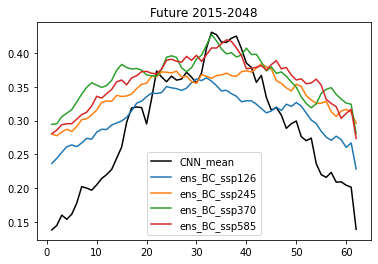

In [14]:
# Change factor

x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn,label='CNN_mean', color='black')

ssps=['126','245','370','585']

for sp in ssps :
    ACCESS_CM2_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    IITMESM_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IITM-ESM_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    IPSL_CM6A_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IPSL-CM6A-LR_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    MPI_ESM1_2_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/MPI-ESM1-2-LR_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    EC_Earth3_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/EC-Earth3_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))

    MTs=[]
    for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        if(d == 0):
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c))/4.0)
        else:
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

    ensFu=cnnObs.copy()
    ensFu.values=MTs
    ensFuMean=ensFu.groupby('time.dayofyear').mean()
    ensFuStd=ensFu.groupby('time.dayofyear').std()


### Bias Correction

    ensFuBC=ensFu.copy()

    for d in cnnObs.time:
        t=pd.Period(d.values, freq='H').dayofyear
        yr=d.dt.year.values
        if(isleap(yr) & t>334 ):
            t=t-1
            
        print(ensFuBC.sel(time=d).values)
        print(ensFuMean.sel(dayofyear=t).values)
        print(ensFuStd.sel(dayofyear=t).values)
        print(ensTsStd.sel(dayofyear=t).values)
        print(cnnObs.sel(time=d,method="nearest").values)
        print(ensTsMean.sel(dayofyear=t).values)
    #print(t)
    
        ensFuBC.sel(time=d).values = (ensFuMean.sel(dayofyear=t).values + 
                                    ensFuStd.sel(dayofyear=t).values/ensTsStd.sel(dayofyear=t).values *
                                    (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    
        print((ensFuMean.sel(dayofyear=t).values + 
                                                     (ensFuStd.sel(dayofyear=t).values/ensTsStd.sel(dayofyear=t).values) * 
                                                     (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values)))
        print(ensFuBC.sel(time=d).values)
        print("%%%%nearest%%%%%%%")
    


    ensFuBC  
    ensFuBCMean1=ensFuBC.groupby('time.dayofyear').mean()
    ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
    ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

    plt.plot(x,ensFuBCMean,label='ens_BC_ssp'+sp)

plt.title('Future 2015-2048')    
plt.legend()

#print(ensFuStd)
#print(ensTsStd)

#print(ensFuStd/ensTsStd)

print(ensFuMean-ensTsMean)
#print(cnnObs)


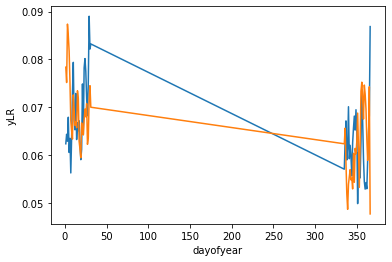

In [7]:
ensFuStd.plot()
ensTsStd.plot()

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

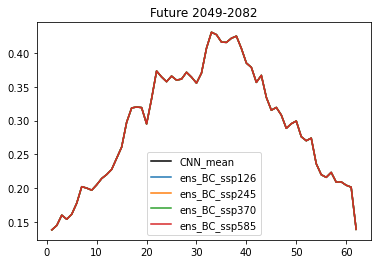

In [8]:
# Change factor

x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn,label='CNN_mean', color='black')

ssps=('126','245','370','585')

for sp in ssps :
    ACCESS_CM2_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    IITMESM_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IITM-ESM_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    IPSL_CM6A_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IPSL-CM6A-LR_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    MPI_ESM1_2_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/MPI-ESM1-2-LR_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    EC_Earth3_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/EC-Earth3_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))

    MTs=[]
    for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        if(d == 0):
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c))/4.0)
        else:
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

    ensFu=cnnObs.copy()
    ensFu.values=MTs
    ensFuMean=ensFu.groupby('time.dayofyear').mean()
    ensFuStd=ensFu.groupby('time.dayofyear').std()


### Bias Correction

    ensFuBC=cnnObs.copy()

    for d in cnnObs.time:
        t=pd.Period(d.values, freq='H').dayofyear
        yr=d.dt.year.values
        if(isleap(yr) & t>334 ):
            t=t-1
    #print(t)
        ensFuBC.sel(time=d).values=(ensFuMean.sel(dayofyear=t).values+
                               (ensTsStd.sel(dayofyear=t).values/ensFuStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    


    ensFuBC  
    ensFuBCMean1=ensFuBC.groupby('time.dayofyear').mean()
    ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
    ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

    plt.plot(x,ensFuBCMean,label='ens_BC_ssp'+sp)

plt.title('Future 2049-2082')    
plt.legend()


